In [1]:
# Load all libraries

import pandas as pd
import sys 
import numpy as np
import seaborn as sns
from math import sqrt
from pylab import rcParams

from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import RidgeCV
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import f_regression
from sklearn.decomposition import PCA
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet, Lasso
from sklearn.linear_model import LassoCV
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from sklearn.kernel_ridge import KernelRidge

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
plt.rcParams["figure.figsize"] = (8, 6)

df = pd.read_csv('C:/datasets/spaceship-titanic/train.csv')
df['CryoSleep'] = df['CryoSleep'].replace(False,'False')
df['CryoSleep'] = df['CryoSleep'].replace(True,'True')
sub = pd.read_csv('C:/datasets/spaceship-titanic/test.csv')
sub['CryoSleep'] = sub['CryoSleep'].replace(False,'False')
sub['CryoSleep'] = sub['CryoSleep'].replace(True,'True')

In [2]:
# checking all data types, in order to preprocess data for future classification
df.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [3]:
# Imputation of missing values with GradiendBoosting algorithm

df_HomePlanet = df.copy()

df_HomePlanet = df_HomePlanet.drop(['PassengerId','Transported'], axis=1)

cat_cols = df_HomePlanet.dtypes[df_HomePlanet.dtypes == 'object'].index.tolist()

num_cols = ((df_HomePlanet.dtypes[df_HomePlanet.dtypes != 'object'])[:-1]).index.tolist()
cat_cols.remove('HomePlanet')

for col in cat_cols:
    df_HomePlanet[col] = df_HomePlanet[col].fillna(df_HomePlanet[col].mode().tolist()[0])

df_HomePlanet['Age'] = df_HomePlanet['Age'].fillna(df_HomePlanet['Age'].median())

df_HomePlanet['RoomService'] = df_HomePlanet['RoomService'].fillna(df_HomePlanet['RoomService'].median())

df_HomePlanet['FoodCourt'] = df_HomePlanet['FoodCourt'].fillna(df_HomePlanet['FoodCourt'].median())

df_HomePlanet['ShoppingMall'] = df_HomePlanet['ShoppingMall'].fillna(df_HomePlanet['ShoppingMall'].median())

df_HomePlanet['Spa'] = df_HomePlanet['Spa'].fillna(df_HomePlanet['Spa'].median())

df_HomePlanet['VRDeck'] = df_HomePlanet['VRDeck'].fillna(df_HomePlanet['VRDeck'].median())

col_1, col_2, col_3 = [], [], []
for i in range(df_HomePlanet['Cabin'].shape[0]):
    str_lst = df_HomePlanet['Cabin'].iloc[i].split('/')
    col_1.append(str_lst[0])
    col_2.append(str_lst[1])
    col_3.append(str_lst[2])
col_1 = pd.DataFrame(col_1)
col_2 = pd.DataFrame(col_2)
col_3 = pd.DataFrame(col_3)
df_HomePlanet['1Cabin_Class1'] = col_1
df_HomePlanet['2Cabin_Seat'] = col_2
df_HomePlanet['3Cabin_Option'] = col_3

df_HomePlanet = df_HomePlanet.drop('Cabin',axis=1)

le = LabelEncoder()
transformed = le.fit_transform(df_HomePlanet['CryoSleep'])
transformed = pd.DataFrame(transformed).rename(columns={0:'CryoSleep'})
df_HomePlanet = df_HomePlanet.drop('CryoSleep', axis=1)
df_HomePlanet = df_HomePlanet.reset_index()
df_HomePlanet['CryoSleep'] = transformed['CryoSleep'].copy() 
df_HomePlanet = df_HomePlanet.drop('index', axis=1)

le = LabelEncoder()
transformed = le.fit_transform(df_HomePlanet['VIP'])
transformed = pd.DataFrame(transformed).rename(columns={0:'VIP'})
df_HomePlanet = df_HomePlanet.drop('VIP', axis=1)
df_HomePlanet = df_HomePlanet.reset_index()
df_HomePlanet['VIP'] = transformed['VIP'].copy() 
df_HomePlanet = df_HomePlanet.drop('index', axis=1)

ohe = OneHotEncoder()
transformed = ohe.fit_transform(df_HomePlanet['Destination'].to_numpy().reshape(-1, 1))
transformed = pd.DataFrame(transformed.toarray())
for i in range(0,transformed.shape[1]):
    transformed = transformed.rename(columns={i:((ohe.get_feature_names_out())[i][3:])})
df_HomePlanet = df_HomePlanet.drop('Destination', axis=1)
df_HomePlanet = df_HomePlanet.reset_index()
for col in transformed.columns:
    df_HomePlanet[col] = transformed[col].copy() 
df_HomePlanet = df_HomePlanet.drop('index', axis=1)

df_HomePlanet = df_HomePlanet.drop('Name',axis=1)

le = LabelEncoder()
transformed = le.fit_transform(df_HomePlanet['3Cabin_Option'])
transformed = pd.DataFrame(transformed).rename(columns={0:'3Cabin_Option'})
df_HomePlanet = df_HomePlanet.drop('3Cabin_Option', axis=1)
df_HomePlanet = df_HomePlanet.reset_index()
df_HomePlanet['3Cabin_Option'] = transformed['3Cabin_Option'].copy() 
df_HomePlanet = df_HomePlanet.drop('index', axis=1)
ohe = OneHotEncoder()
transformed = ohe.fit_transform(df_HomePlanet['1Cabin_Class1'].to_numpy().reshape(-1, 1))
transformed = pd.DataFrame(transformed.toarray())
for i in range(0,transformed.shape[1]):
    transformed = transformed.rename(columns={i:((ohe.get_feature_names_out())[i][3:])})
df_HomePlanet = df_HomePlanet.drop('1Cabin_Class1', axis=1)
df_HomePlanet = df_HomePlanet.reset_index()
for col in transformed.columns:
    df_HomePlanet[col] = transformed[col].copy()
    
df_HomePlanet = df_HomePlanet.drop('index', axis=1)
df_HomePlanet['2Cabin_Seat'] = df_HomePlanet['2Cabin_Seat'].astype('float64')
df_HomePlanet['HomePlanet'] = df_HomePlanet['HomePlanet'].fillna('None')
index_of_NaN_cols = df_HomePlanet['HomePlanet'][df_HomePlanet['HomePlanet'] == 'None'].index
df_HomePlanet_for_train = df_HomePlanet.drop(index_of_NaN_cols,axis=0).copy()
df_HomePlanet_for_fit = df_HomePlanet[df_HomePlanet['HomePlanet'] == 'None'].copy()

gd_clf = GradientBoostingClassifier(subsample=0.8999999999999999, n_estimators=300, learning_rate=0.060000000000000005, criterion='friedman_mse')
X = df_HomePlanet_for_train.drop('HomePlanet', axis=1)
y = df_HomePlanet_for_train['HomePlanet']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=17)
gd_clf.fit(X_train, y_train)
put_to = pd.DataFrame(gd_clf.predict(df_HomePlanet_for_fit.drop('HomePlanet', axis=1)))
put_to['index1'] = index_of_NaN_cols
put_to = put_to.set_index('index1')
put_to = put_to.rename(columns={0:'HomePlanet'})
put_to.index.name = None
df_HomePlanet_for_fit['HomePlanet'] = put_to
conc = pd.DataFrame(df_HomePlanet_for_train['HomePlanet'].append(put_to['HomePlanet'], ignore_index = False),columns=['HomePlanet'])
conc = conc.sort_index(axis=0)
df_HomePlanet['HomePlanet'] = conc['HomePlanet']
df['HomePlanet'] = df_HomePlanet['HomePlanet']

C:\Users\TimK\AppData\Local\Temp\ipykernel_6348\2477979031.py:106: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  conc = pd.DataFrame(df_HomePlanet_for_train['HomePlanet'].append(put_to['HomePlanet'], ignore_index = False),columns=['HomePlanet'])


In [4]:
df.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [5]:
df_CryoSleep = df.copy()

df_CryoSleep = df_CryoSleep.drop(['PassengerId','Transported'], axis=1)

cat_cols = df_CryoSleep.dtypes[df_CryoSleep.dtypes == 'object'].index.tolist()

num_cols = ((df_CryoSleep.dtypes[df_CryoSleep.dtypes != 'object'])[:-1]).index.tolist()
cat_cols.remove('CryoSleep')

for col in cat_cols:
    df_CryoSleep[col] = df_CryoSleep[col].fillna(df_CryoSleep[col].mode().tolist()[0])

df_CryoSleep['Age'] = df_CryoSleep['Age'].fillna(df_CryoSleep['Age'].median())

df_CryoSleep['RoomService'] = df_CryoSleep['RoomService'].fillna(df_CryoSleep['RoomService'].median())

df_CryoSleep['FoodCourt'] = df_CryoSleep['FoodCourt'].fillna(df_CryoSleep['FoodCourt'].median())

df_CryoSleep['ShoppingMall'] = df_CryoSleep['ShoppingMall'].fillna(df_CryoSleep['ShoppingMall'].median())

df_CryoSleep['Spa'] = df_CryoSleep['Spa'].fillna(df_CryoSleep['Spa'].median())

df_CryoSleep['VRDeck'] = df_CryoSleep['VRDeck'].fillna(df_CryoSleep['VRDeck'].median())

col_1, col_2, col_3 = [], [], []
for i in range(df_CryoSleep['Cabin'].shape[0]):
    str_lst = df_CryoSleep['Cabin'].iloc[i].split('/')
    col_1.append(str_lst[0])
    col_2.append(str_lst[1])
    col_3.append(str_lst[2])
col_1 = pd.DataFrame(col_1)
col_2 = pd.DataFrame(col_2)
col_3 = pd.DataFrame(col_3)
df_CryoSleep['1Cabin_Class1'] = col_1
df_CryoSleep['2Cabin_Seat'] = col_2
df_CryoSleep['3Cabin_Option'] = col_3

df_CryoSleep = df_CryoSleep.drop('Cabin',axis=1)

le = LabelEncoder()
transformed = le.fit_transform(df_CryoSleep['VIP'])
transformed = pd.DataFrame(transformed).rename(columns={0:'VIP'})
df_CryoSleep = df_CryoSleep.drop('VIP', axis=1)
df_CryoSleep = df_CryoSleep.reset_index()
df_CryoSleep['VIP'] = transformed['VIP'].copy() 
df_CryoSleep = df_CryoSleep.drop('index', axis=1)

ohe = OneHotEncoder()
transformed = ohe.fit_transform(df_CryoSleep['Destination'].to_numpy().reshape(-1, 1))
transformed = pd.DataFrame(transformed.toarray())
for i in range(0,transformed.shape[1]):
    transformed = transformed.rename(columns={i:((ohe.get_feature_names_out())[i][3:])})
df_CryoSleep = df_CryoSleep.drop('Destination', axis=1)
df_CryoSleep = df_CryoSleep.reset_index()
for col in transformed.columns:
    df_CryoSleep[col] = transformed[col].copy() 
df_CryoSleep = df_CryoSleep.drop('index', axis=1)

df_CryoSleep = df_CryoSleep.drop('Name',axis=1)

ohe = OneHotEncoder()
transformed = ohe.fit_transform(df_CryoSleep['HomePlanet'].to_numpy().reshape(-1, 1))
transformed = pd.DataFrame(transformed.toarray())
for i in range(0,transformed.shape[1]):
    transformed = transformed.rename(columns={i:((ohe.get_feature_names_out())[i][3:])})
df_CryoSleep = df_CryoSleep.drop('HomePlanet', axis=1)
df_CryoSleep = df_CryoSleep.reset_index()
for col in transformed.columns:
    df_CryoSleep[col] = transformed[col].copy() 
df_CryoSleep = df_CryoSleep.drop('index', axis=1)

le = LabelEncoder()
transformed = le.fit_transform(df_CryoSleep['3Cabin_Option'])
transformed = pd.DataFrame(transformed).rename(columns={0:'3Cabin_Option'})
df_CryoSleep = df_CryoSleep.drop('3Cabin_Option', axis=1)
df_CryoSleep = df_CryoSleep.reset_index()
df_CryoSleep['3Cabin_Option'] = transformed['3Cabin_Option'].copy() 
df_CryoSleep = df_CryoSleep.drop('index', axis=1)
ohe = OneHotEncoder()
transformed = ohe.fit_transform(df_CryoSleep['1Cabin_Class1'].to_numpy().reshape(-1, 1))
transformed = pd.DataFrame(transformed.toarray())
for i in range(0,transformed.shape[1]):
    transformed = transformed.rename(columns={i:((ohe.get_feature_names_out())[i][3:])})
df_CryoSleep = df_CryoSleep.drop('1Cabin_Class1', axis=1)
df_CryoSleep = df_CryoSleep.reset_index()
for col in transformed.columns:
    df_CryoSleep[col] = transformed[col].copy()

df_CryoSleep = df_CryoSleep.drop('index', axis=1)
df_CryoSleep['2Cabin_Seat'] = df_CryoSleep['2Cabin_Seat'].astype('float64')
df_CryoSleep['CryoSleep'] = df_CryoSleep['CryoSleep'].fillna('None')
df_CryoSleep['CryoSleep'] = df_CryoSleep['CryoSleep'].astype('str')
index_of_NaN_cols = df_CryoSleep['CryoSleep'][df_CryoSleep['CryoSleep'] == 'None'].index
df_CryoSleep_for_train = df_CryoSleep.drop(index_of_NaN_cols,axis=0).copy()
df_CryoSleep_for_fit = df_CryoSleep[df_CryoSleep['CryoSleep'] == 'None'].copy()

gd_clf = GradientBoostingClassifier(subsample=0.8999999999999999, n_estimators=300, learning_rate=0.060000000000000005, criterion='friedman_mse')
X = df_CryoSleep_for_train.drop('CryoSleep', axis=1)
y = df_CryoSleep_for_train['CryoSleep']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=17)
gd_clf.fit(X_train, y_train)
put_to = pd.DataFrame(gd_clf.predict(df_CryoSleep_for_fit.drop('CryoSleep', axis=1)))
put_to['index1'] = index_of_NaN_cols
put_to = put_to.set_index('index1')
put_to = put_to.rename(columns={0:'CryoSleep'})
put_to.index.name = None
df_CryoSleep_for_fit['CryoSleep'] = put_to
conc = pd.DataFrame(df_CryoSleep_for_train['CryoSleep'].append(put_to['CryoSleep'], ignore_index = False),columns=['CryoSleep'])
conc = conc.sort_index(axis=0)
df_CryoSleep['CryoSleep'] = conc['CryoSleep']
df['CryoSleep'] = df_CryoSleep['CryoSleep']

C:\Users\TimK\AppData\Local\Temp\ipykernel_6348\2286400651.py:109: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  conc = pd.DataFrame(df_CryoSleep_for_train['CryoSleep'].append(put_to['CryoSleep'], ignore_index = False),columns=['CryoSleep'])


In [6]:
df_Destination = df.copy()

df_Destination = df_Destination.drop(['PassengerId','Transported'], axis=1)

cat_cols = df_Destination.dtypes[df_Destination.dtypes == 'object'].index.tolist()

num_cols = ((df_Destination.dtypes[df_Destination.dtypes != 'object'])[:-1]).index.tolist()
cat_cols.remove('Destination')

for col in cat_cols:
    df_Destination[col] = df_Destination[col].fillna(df_Destination[col].mode().tolist()[0])

df_Destination['Age'] = df_Destination['Age'].fillna(df_Destination['Age'].median())

df_Destination['RoomService'] = df_Destination['RoomService'].fillna(df_Destination['RoomService'].median())

df_Destination['FoodCourt'] = df_Destination['FoodCourt'].fillna(df_Destination['FoodCourt'].median())

df_Destination['ShoppingMall'] = df_Destination['ShoppingMall'].fillna(df_Destination['ShoppingMall'].median())

df_Destination['Spa'] = df_Destination['Spa'].fillna(df_Destination['Spa'].median())

df_Destination['VRDeck'] = df_Destination['VRDeck'].fillna(df_Destination['VRDeck'].median())

col_1, col_2, col_3 = [], [], []
for i in range(df_Destination['Cabin'].shape[0]):
    str_lst = df_Destination['Cabin'].iloc[i].split('/')
    col_1.append(str_lst[0])
    col_2.append(str_lst[1])
    col_3.append(str_lst[2])
col_1 = pd.DataFrame(col_1)
col_2 = pd.DataFrame(col_2)
col_3 = pd.DataFrame(col_3)
df_Destination['1Cabin_Class1'] = col_1
df_Destination['2Cabin_Seat'] = col_2
df_Destination['3Cabin_Option'] = col_3

df_Destination = df_Destination.drop('Cabin',axis=1)

le = LabelEncoder()
transformed = le.fit_transform(df_Destination['VIP'])
transformed = pd.DataFrame(transformed).rename(columns={0:'VIP'})
df_Destination = df_Destination.drop('VIP', axis=1)
df_Destination = df_Destination.reset_index()
df_Destination['VIP'] = transformed['VIP'].copy() 
df_Destination = df_Destination.drop('index', axis=1)

df_Destination['CryoSleep'] = df_Destination['CryoSleep'].astype('str')
le = LabelEncoder()
transformed = le.fit_transform(df_Destination['CryoSleep'])
transformed = pd.DataFrame(transformed).rename(columns={0:'CryoSleep'})
df_Destination = df_Destination.drop('CryoSleep', axis=1)
df_Destination = df_Destination.reset_index()
df_Destination['CryoSleep'] = transformed['CryoSleep'].copy() 
df_Destination = df_Destination.drop('index', axis=1)

df_Destination = df_Destination.drop('Name',axis=1)

ohe = OneHotEncoder()
transformed = ohe.fit_transform(df_Destination['HomePlanet'].to_numpy().reshape(-1, 1))
transformed = pd.DataFrame(transformed.toarray())
for i in range(0,transformed.shape[1]):
    transformed = transformed.rename(columns={i:((ohe.get_feature_names_out())[i][3:])})
df_Destination = df_Destination.drop('HomePlanet', axis=1)
df_Destination = df_Destination.reset_index()
for col in transformed.columns:
    df_Destination[col] = transformed[col].copy() 
df_Destination = df_Destination.drop('index', axis=1)

le = LabelEncoder()
transformed = le.fit_transform(df_Destination['3Cabin_Option'])
transformed = pd.DataFrame(transformed).rename(columns={0:'3Cabin_Option'})
df_Destination = df_Destination.drop('3Cabin_Option', axis=1)
df_Destination = df_Destination.reset_index()
df_Destination['3Cabin_Option'] = transformed['3Cabin_Option'].copy() 
df_Destination = df_Destination.drop('index', axis=1)
ohe = OneHotEncoder()
transformed = ohe.fit_transform(df_Destination['1Cabin_Class1'].to_numpy().reshape(-1, 1))
transformed = pd.DataFrame(transformed.toarray())
for i in range(0,transformed.shape[1]):
    transformed = transformed.rename(columns={i:((ohe.get_feature_names_out())[i][3:])})
df_Destination = df_Destination.drop('1Cabin_Class1', axis=1)
df_Destination = df_Destination.reset_index()
for col in transformed.columns:
    df_Destination[col] = transformed[col].copy()

df_Destination = df_Destination.drop('index', axis=1)
df_Destination['2Cabin_Seat'] = df_Destination['2Cabin_Seat'].astype('float64')
df_Destination['Destination'] = df_Destination['Destination'].fillna('None')
index_of_NaN_cols = df_Destination['Destination'][df_Destination['Destination'] == 'None'].index
df_Destination_for_train = df_Destination.drop(index_of_NaN_cols,axis=0).copy()
df_Destination_for_fit = df_Destination[df_Destination['Destination'] == 'None'].copy()

gd_clf = GradientBoostingClassifier(subsample=0.8999999999999999, n_estimators=300, learning_rate=0.060000000000000005, criterion='friedman_mse')
X = df_Destination_for_train.drop('Destination', axis=1)
y = df_Destination_for_train['Destination']

y = y.astype('str')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=17)
gd_clf.fit(X_train, y_train)
put_to = pd.DataFrame(gd_clf.predict(df_Destination_for_fit.drop('Destination', axis=1)))
put_to['index1'] = index_of_NaN_cols
put_to = put_to.set_index('index1')
put_to = put_to.rename(columns={0:'Destination'})
put_to.index.name = None
df_Destination_for_fit['Destination'] = put_to
conc = pd.DataFrame(df_Destination_for_train['Destination'].append(put_to['Destination'], ignore_index = False),columns=['Destination'])
conc = conc.sort_index(axis=0)
df_Destination['Destination'] = conc['Destination']
df['Destination'] = df_Destination['Destination']

C:\Users\TimK\AppData\Local\Temp\ipykernel_6348\842225231.py:108: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  conc = pd.DataFrame(df_Destination_for_train['Destination'].append(put_to['Destination'], ignore_index = False),columns=['Destination'])


In [7]:
df_VIP = df.copy()

df_VIP = df_VIP.drop(['PassengerId','Transported'], axis=1)

cat_cols = df_VIP.dtypes[df_VIP.dtypes == 'object'].index.tolist()

num_cols = ((df_VIP.dtypes[df_VIP.dtypes != 'object'])[:-1]).index.tolist()
cat_cols.remove('VIP')

for col in cat_cols:
    df_VIP[col] = df_VIP[col].fillna(df_VIP[col].mode().tolist()[0])

df_VIP['Age'] = df_VIP['Age'].fillna(df_VIP['Age'].median())

df_VIP['RoomService'] = df_VIP['RoomService'].fillna(df_VIP['RoomService'].median())

df_VIP['FoodCourt'] = df_VIP['FoodCourt'].fillna(df_VIP['FoodCourt'].median())

df_VIP['ShoppingMall'] = df_VIP['ShoppingMall'].fillna(df_VIP['ShoppingMall'].median())

df_VIP['Spa'] = df_VIP['Spa'].fillna(df_VIP['Spa'].median())

df_VIP['VRDeck'] = df_VIP['VRDeck'].fillna(df_VIP['VRDeck'].median())

col_1, col_2, col_3 = [], [], []
for i in range(df_VIP['Cabin'].shape[0]):
    str_lst = df_VIP['Cabin'].iloc[i].split('/')
    col_1.append(str_lst[0])
    col_2.append(str_lst[1])
    col_3.append(str_lst[2])
col_1 = pd.DataFrame(col_1)
col_2 = pd.DataFrame(col_2)
col_3 = pd.DataFrame(col_3)
df_VIP['1Cabin_Class1'] = col_1
df_VIP['2Cabin_Seat'] = col_2
df_VIP['3Cabin_Option'] = col_3

df_VIP = df_VIP.drop('Cabin',axis=1)

ohe = OneHotEncoder()
transformed = ohe.fit_transform(df_VIP['Destination'].to_numpy().reshape(-1, 1))
transformed = pd.DataFrame(transformed.toarray())
for i in range(0,transformed.shape[1]):
    transformed = transformed.rename(columns={i:((ohe.get_feature_names_out())[i][3:])})
df_VIP = df_VIP.drop('Destination', axis=1)
df_VIP = df_VIP.reset_index()
for col in transformed.columns:
    df_VIP[col] = transformed[col].copy() 
df_VIP = df_VIP.drop('index', axis=1)

df_VIP['CryoSleep'] = df_VIP['CryoSleep'].astype('str')
le = LabelEncoder()
transformed = le.fit_transform(df_VIP['CryoSleep'])
transformed = pd.DataFrame(transformed).rename(columns={0:'CryoSleep'})
df_VIP = df_VIP.drop('CryoSleep', axis=1)
df_VIP = df_VIP.reset_index()
df_VIP['CryoSleep'] = transformed['CryoSleep'].copy() 
df_VIP = df_VIP.drop('index', axis=1)

df_VIP = df_VIP.drop('Name',axis=1)

ohe = OneHotEncoder()
transformed = ohe.fit_transform(df_VIP['HomePlanet'].to_numpy().reshape(-1, 1))
transformed = pd.DataFrame(transformed.toarray())
for i in range(0,transformed.shape[1]):
    transformed = transformed.rename(columns={i:((ohe.get_feature_names_out())[i][3:])})
df_VIP = df_VIP.drop('HomePlanet', axis=1)
df_VIP = df_VIP.reset_index()
for col in transformed.columns:
    df_VIP[col] = transformed[col].copy() 
df_VIP = df_VIP.drop('index', axis=1)

le = LabelEncoder()
transformed = le.fit_transform(df_VIP['3Cabin_Option'])
transformed = pd.DataFrame(transformed).rename(columns={0:'3Cabin_Option'})
df_VIP = df_VIP.drop('3Cabin_Option', axis=1)
df_VIP = df_VIP.reset_index()
df_VIP['3Cabin_Option'] = transformed['3Cabin_Option'].copy() 
df_VIP = df_VIP.drop('index', axis=1)
ohe = OneHotEncoder()
transformed = ohe.fit_transform(df_VIP['1Cabin_Class1'].to_numpy().reshape(-1, 1))
transformed = pd.DataFrame(transformed.toarray())
for i in range(0,transformed.shape[1]):
    transformed = transformed.rename(columns={i:((ohe.get_feature_names_out())[i][3:])})
df_VIP = df_VIP.drop('1Cabin_Class1', axis=1)
df_VIP = df_VIP.reset_index()
for col in transformed.columns:
    df_VIP[col] = transformed[col].copy()

df_VIP = df_VIP.drop('index', axis=1)
df_VIP['2Cabin_Seat'] = df_VIP['2Cabin_Seat'].astype('float64')
df_VIP['VIP'] = df_VIP['VIP'].fillna('None')
df_VIP['VIP'] = df_VIP['VIP'].astype('str')

index_of_NaN_cols = df_VIP['VIP'][df_VIP['VIP'] == 'None'].index
df_VIP_for_train = df_VIP.drop(index_of_NaN_cols,axis=0).copy()
df_VIP_for_fit = df_VIP[df_VIP['VIP'] == 'None'].copy()

gd_clf = GradientBoostingClassifier(subsample=0.8999999999999999, n_estimators=300, learning_rate=0.060000000000000005, criterion='friedman_mse')
X = df_VIP_for_train.drop('VIP', axis=1)
y = df_VIP_for_train['VIP']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=17)
gd_clf.fit(X_train, y_train)
put_to = pd.DataFrame(gd_clf.predict(df_VIP_for_fit.drop('VIP', axis=1)))
put_to['index1'] = index_of_NaN_cols
put_to = put_to.set_index('index1')
put_to = put_to.rename(columns={0:'VIP'})
put_to.index.name = None
df_VIP_for_fit['VIP'] = put_to
conc = pd.DataFrame(df_VIP_for_train['VIP'].append(put_to['VIP'], ignore_index = False),columns=['VIP'])
conc = conc.sort_index(axis=0)
df_VIP['VIP'] = conc['VIP']
df['VIP'] = df_VIP['VIP']

C:\Users\TimK\AppData\Local\Temp\ipykernel_6348\2290201661.py:112: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  conc = pd.DataFrame(df_VIP_for_train['VIP'].append(put_to['VIP'], ignore_index = False),columns=['VIP'])


In [8]:
df.isna().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin           199
Destination       0
Age             179
VIP               0
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [9]:
# same imputation for test dataset

sub_HomePlanet = sub.copy()

sub_HomePlanet = sub_HomePlanet.drop('PassengerId', axis=1)

cat_cols = sub_HomePlanet.dtypes[sub_HomePlanet.dtypes == 'object'].index.tolist()

num_cols = ((sub_HomePlanet.dtypes[sub_HomePlanet.dtypes != 'object'])[:-1]).index.tolist()
cat_cols.remove('HomePlanet')

for col in cat_cols:
    sub_HomePlanet[col] = sub_HomePlanet[col].fillna(sub_HomePlanet[col].mode().tolist()[0])

sub_HomePlanet['Age'] = sub_HomePlanet['Age'].fillna(sub_HomePlanet['Age'].median())

sub_HomePlanet['RoomService'] = sub_HomePlanet['RoomService'].fillna(sub_HomePlanet['RoomService'].median())

sub_HomePlanet['FoodCourt'] = sub_HomePlanet['FoodCourt'].fillna(sub_HomePlanet['FoodCourt'].median())

sub_HomePlanet['ShoppingMall'] = sub_HomePlanet['ShoppingMall'].fillna(sub_HomePlanet['ShoppingMall'].median())

sub_HomePlanet['Spa'] = sub_HomePlanet['Spa'].fillna(sub_HomePlanet['Spa'].median())

sub_HomePlanet['VRDeck'] = sub_HomePlanet['VRDeck'].fillna(sub_HomePlanet['VRDeck'].median())

col_1, col_2, col_3 = [], [], []
for i in range(sub_HomePlanet['Cabin'].shape[0]):
    str_lst = sub_HomePlanet['Cabin'].iloc[i].split('/')
    col_1.append(str_lst[0])
    col_2.append(str_lst[1])
    col_3.append(str_lst[2])
col_1 = pd.DataFrame(col_1)
col_2 = pd.DataFrame(col_2)
col_3 = pd.DataFrame(col_3)
sub_HomePlanet['1Cabin_Class1'] = col_1
sub_HomePlanet['2Cabin_Seat'] = col_2
sub_HomePlanet['3Cabin_Option'] = col_3

sub_HomePlanet = sub_HomePlanet.drop('Cabin',axis=1)

le = LabelEncoder()
transformed = le.fit_transform(sub_HomePlanet['CryoSleep'])
transformed = pd.DataFrame(transformed).rename(columns={0:'CryoSleep'})
sub_HomePlanet = sub_HomePlanet.drop('CryoSleep', axis=1)
sub_HomePlanet = sub_HomePlanet.reset_index()
sub_HomePlanet['CryoSleep'] = transformed['CryoSleep'].copy() 
sub_HomePlanet = sub_HomePlanet.drop('index', axis=1)

le = LabelEncoder()
transformed = le.fit_transform(sub_HomePlanet['VIP'])
transformed = pd.DataFrame(transformed).rename(columns={0:'VIP'})
sub_HomePlanet = sub_HomePlanet.drop('VIP', axis=1)
sub_HomePlanet = sub_HomePlanet.reset_index()
sub_HomePlanet['VIP'] = transformed['VIP'].copy() 
sub_HomePlanet = sub_HomePlanet.drop('index', axis=1)

ohe = OneHotEncoder()
transformed = ohe.fit_transform(sub_HomePlanet['Destination'].to_numpy().reshape(-1, 1))
transformed = pd.DataFrame(transformed.toarray())
for i in range(0,transformed.shape[1]):
    transformed = transformed.rename(columns={i:((ohe.get_feature_names_out())[i][3:])})
sub_HomePlanet = sub_HomePlanet.drop('Destination', axis=1)
sub_HomePlanet = sub_HomePlanet.reset_index()
for col in transformed.columns:
    sub_HomePlanet[col] = transformed[col].copy() 
sub_HomePlanet = sub_HomePlanet.drop('index', axis=1)

sub_HomePlanet = sub_HomePlanet.drop('Name',axis=1)

le = LabelEncoder()
transformed = le.fit_transform(sub_HomePlanet['3Cabin_Option'])
transformed = pd.DataFrame(transformed).rename(columns={0:'3Cabin_Option'})
sub_HomePlanet = sub_HomePlanet.drop('3Cabin_Option', axis=1)
sub_HomePlanet = sub_HomePlanet.reset_index()
sub_HomePlanet['3Cabin_Option'] = transformed['3Cabin_Option'].copy() 
sub_HomePlanet = sub_HomePlanet.drop('index', axis=1)
ohe = OneHotEncoder()
transformed = ohe.fit_transform(sub_HomePlanet['1Cabin_Class1'].to_numpy().reshape(-1, 1))
transformed = pd.DataFrame(transformed.toarray())
for i in range(0,transformed.shape[1]):
    transformed = transformed.rename(columns={i:((ohe.get_feature_names_out())[i][3:])})
sub_HomePlanet = sub_HomePlanet.drop('1Cabin_Class1', axis=1)
sub_HomePlanet = sub_HomePlanet.reset_index()
for col in transformed.columns:
    sub_HomePlanet[col] = transformed[col].copy()
    
sub_HomePlanet = sub_HomePlanet.drop('index', axis=1)
sub_HomePlanet['2Cabin_Seat'] = sub_HomePlanet['2Cabin_Seat'].astype('float64')
sub_HomePlanet['HomePlanet'] = sub_HomePlanet['HomePlanet'].fillna('None')
index_of_NaN_cols = sub_HomePlanet['HomePlanet'][sub_HomePlanet['HomePlanet'] == 'None'].index
sub_HomePlanet_for_train = sub_HomePlanet.drop(index_of_NaN_cols,axis=0).copy()
sub_HomePlanet_for_fit = sub_HomePlanet[sub_HomePlanet['HomePlanet'] == 'None'].copy()

gd_clf = GradientBoostingClassifier(subsample=0.8999999999999999, n_estimators=300, learning_rate=0.060000000000000005, criterion='friedman_mse')
X = sub_HomePlanet_for_train.drop('HomePlanet', axis=1)
y = sub_HomePlanet_for_train['HomePlanet']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=17)
gd_clf.fit(X_train, y_train)
put_to = pd.DataFrame(gd_clf.predict(sub_HomePlanet_for_fit.drop('HomePlanet', axis=1)))
put_to['index1'] = index_of_NaN_cols
put_to = put_to.set_index('index1')
put_to = put_to.rename(columns={0:'HomePlanet'})
put_to.index.name = None
sub_HomePlanet_for_fit['HomePlanet'] = put_to
conc = pd.DataFrame(sub_HomePlanet_for_train['HomePlanet'].append(put_to['HomePlanet'], ignore_index = False),columns=['HomePlanet'])
conc = conc.sort_index(axis=0)
sub_HomePlanet['HomePlanet'] = conc['HomePlanet']
sub['HomePlanet'] = sub_HomePlanet['HomePlanet']

C:\Users\TimK\AppData\Local\Temp\ipykernel_6348\2917190703.py:106: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  conc = pd.DataFrame(sub_HomePlanet_for_train['HomePlanet'].append(put_to['HomePlanet'], ignore_index = False),columns=['HomePlanet'])


In [10]:
sub_CryoSleep = sub.copy()

sub_CryoSleep = sub_CryoSleep.drop('PassengerId', axis=1)

cat_cols = sub_CryoSleep.dtypes[sub_CryoSleep.dtypes == 'object'].index.tolist()

num_cols = ((sub_CryoSleep.dtypes[sub_CryoSleep.dtypes != 'object'])[:-1]).index.tolist()
cat_cols.remove('CryoSleep')

for col in cat_cols:
    sub_CryoSleep[col] = sub_CryoSleep[col].fillna(sub_CryoSleep[col].mode().tolist()[0])

sub_CryoSleep['Age'] = sub_CryoSleep['Age'].fillna(sub_CryoSleep['Age'].median())

sub_CryoSleep['RoomService'] = sub_CryoSleep['RoomService'].fillna(sub_CryoSleep['RoomService'].median())

sub_CryoSleep['FoodCourt'] = sub_CryoSleep['FoodCourt'].fillna(sub_CryoSleep['FoodCourt'].median())

sub_CryoSleep['ShoppingMall'] = sub_CryoSleep['ShoppingMall'].fillna(sub_CryoSleep['ShoppingMall'].median())

sub_CryoSleep['Spa'] = sub_CryoSleep['Spa'].fillna(sub_CryoSleep['Spa'].median())

sub_CryoSleep['VRDeck'] = sub_CryoSleep['VRDeck'].fillna(sub_CryoSleep['VRDeck'].median())

col_1, col_2, col_3 = [], [], []
for i in range(sub_CryoSleep['Cabin'].shape[0]):
    str_lst = sub_CryoSleep['Cabin'].iloc[i].split('/')
    col_1.append(str_lst[0])
    col_2.append(str_lst[1])
    col_3.append(str_lst[2])
col_1 = pd.DataFrame(col_1)
col_2 = pd.DataFrame(col_2)
col_3 = pd.DataFrame(col_3)
sub_CryoSleep['1Cabin_Class1'] = col_1
sub_CryoSleep['2Cabin_Seat'] = col_2
sub_CryoSleep['3Cabin_Option'] = col_3

sub_CryoSleep = sub_CryoSleep.drop('Cabin',axis=1)

le = LabelEncoder()
transformed = le.fit_transform(sub_CryoSleep['VIP'])
transformed = pd.DataFrame(transformed).rename(columns={0:'VIP'})
sub_CryoSleep = sub_CryoSleep.drop('VIP', axis=1)
sub_CryoSleep = sub_CryoSleep.reset_index()
sub_CryoSleep['VIP'] = transformed['VIP'].copy() 
sub_CryoSleep = sub_CryoSleep.drop('index', axis=1)

ohe = OneHotEncoder()
transformed = ohe.fit_transform(sub_CryoSleep['Destination'].to_numpy().reshape(-1, 1))
transformed = pd.DataFrame(transformed.toarray())
for i in range(0,transformed.shape[1]):
    transformed = transformed.rename(columns={i:((ohe.get_feature_names_out())[i][3:])})
sub_CryoSleep = sub_CryoSleep.drop('Destination', axis=1)
sub_CryoSleep = sub_CryoSleep.reset_index()
for col in transformed.columns:
    sub_CryoSleep[col] = transformed[col].copy() 
sub_CryoSleep = sub_CryoSleep.drop('index', axis=1)

sub_CryoSleep = sub_CryoSleep.drop('Name',axis=1)

ohe = OneHotEncoder()
transformed = ohe.fit_transform(sub_CryoSleep['HomePlanet'].to_numpy().reshape(-1, 1))
transformed = pd.DataFrame(transformed.toarray())
for i in range(0,transformed.shape[1]):
    transformed = transformed.rename(columns={i:((ohe.get_feature_names_out())[i][3:])})
sub_CryoSleep = sub_CryoSleep.drop('HomePlanet', axis=1)
sub_CryoSleep = sub_CryoSleep.reset_index()
for col in transformed.columns:
    sub_CryoSleep[col] = transformed[col].copy() 
sub_CryoSleep = sub_CryoSleep.drop('index', axis=1)

le = LabelEncoder()
transformed = le.fit_transform(sub_CryoSleep['3Cabin_Option'])
transformed = pd.DataFrame(transformed).rename(columns={0:'3Cabin_Option'})
sub_CryoSleep = sub_CryoSleep.drop('3Cabin_Option', axis=1)
sub_CryoSleep = sub_CryoSleep.reset_index()
sub_CryoSleep['3Cabin_Option'] = transformed['3Cabin_Option'].copy() 
sub_CryoSleep = sub_CryoSleep.drop('index', axis=1)
ohe = OneHotEncoder()
transformed = ohe.fit_transform(sub_CryoSleep['1Cabin_Class1'].to_numpy().reshape(-1, 1))
transformed = pd.DataFrame(transformed.toarray())
for i in range(0,transformed.shape[1]):
    transformed = transformed.rename(columns={i:((ohe.get_feature_names_out())[i][3:])})
sub_CryoSleep = sub_CryoSleep.drop('1Cabin_Class1', axis=1)
sub_CryoSleep = sub_CryoSleep.reset_index()
for col in transformed.columns:
    sub_CryoSleep[col] = transformed[col].copy()

sub_CryoSleep = sub_CryoSleep.drop('index', axis=1)
sub_CryoSleep['2Cabin_Seat'] = sub_CryoSleep['2Cabin_Seat'].astype('float64')
sub_CryoSleep['CryoSleep'] = sub_CryoSleep['CryoSleep'].fillna('None')
sub_CryoSleep['CryoSleep'] = sub_CryoSleep['CryoSleep'].astype('str')
index_of_NaN_cols = sub_CryoSleep['CryoSleep'][sub_CryoSleep['CryoSleep'] == 'None'].index
sub_CryoSleep_for_train = sub_CryoSleep.drop(index_of_NaN_cols,axis=0).copy()
sub_CryoSleep_for_fit = sub_CryoSleep[sub_CryoSleep['CryoSleep'] == 'None'].copy()

gd_clf = GradientBoostingClassifier(subsample=0.8999999999999999, n_estimators=300, learning_rate=0.060000000000000005, criterion='friedman_mse')
X = sub_CryoSleep_for_train.drop('CryoSleep', axis=1)
y = sub_CryoSleep_for_train['CryoSleep']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=17)
gd_clf.fit(X_train, y_train)
put_to = pd.DataFrame(gd_clf.predict(sub_CryoSleep_for_fit.drop('CryoSleep', axis=1)))
put_to['index1'] = index_of_NaN_cols
put_to = put_to.set_index('index1')
put_to = put_to.rename(columns={0:'CryoSleep'})
put_to.index.name = None
sub_CryoSleep_for_fit['CryoSleep'] = put_to
conc = pd.DataFrame(sub_CryoSleep_for_train['CryoSleep'].append(put_to['CryoSleep'], ignore_index = False),columns=['CryoSleep'])
conc = conc.sort_index(axis=0)
sub_CryoSleep['CryoSleep'] = conc['CryoSleep']
sub['CryoSleep'] = sub_CryoSleep['CryoSleep']

C:\Users\TimK\AppData\Local\Temp\ipykernel_6348\2601509898.py:109: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  conc = pd.DataFrame(sub_CryoSleep_for_train['CryoSleep'].append(put_to['CryoSleep'], ignore_index = False),columns=['CryoSleep'])


In [11]:
sub_Destination = sub.copy()

sub_Destination = sub_Destination.drop('PassengerId', axis=1)

cat_cols = sub_Destination.dtypes[sub_Destination.dtypes == 'object'].index.tolist()

num_cols = ((sub_Destination.dtypes[sub_Destination.dtypes != 'object'])[:-1]).index.tolist()
cat_cols.remove('Destination')

for col in cat_cols:
    sub_Destination[col] = sub_Destination[col].fillna(sub_Destination[col].mode().tolist()[0])

sub_Destination['Age'] = sub_Destination['Age'].fillna(sub_Destination['Age'].median())

sub_Destination['RoomService'] = sub_Destination['RoomService'].fillna(sub_Destination['RoomService'].median())

sub_Destination['FoodCourt'] = sub_Destination['FoodCourt'].fillna(sub_Destination['FoodCourt'].median())

sub_Destination['ShoppingMall'] = sub_Destination['ShoppingMall'].fillna(sub_Destination['ShoppingMall'].median())

sub_Destination['Spa'] = sub_Destination['Spa'].fillna(sub_Destination['Spa'].median())

sub_Destination['VRDeck'] = sub_Destination['VRDeck'].fillna(sub_Destination['VRDeck'].median())

col_1, col_2, col_3 = [], [], []
for i in range(sub_Destination['Cabin'].shape[0]):
    str_lst = sub_Destination['Cabin'].iloc[i].split('/')
    col_1.append(str_lst[0])
    col_2.append(str_lst[1])
    col_3.append(str_lst[2])
col_1 = pd.DataFrame(col_1)
col_2 = pd.DataFrame(col_2)
col_3 = pd.DataFrame(col_3)
sub_Destination['1Cabin_Class1'] = col_1
sub_Destination['2Cabin_Seat'] = col_2
sub_Destination['3Cabin_Option'] = col_3

sub_Destination = sub_Destination.drop('Cabin',axis=1)

le = LabelEncoder()
transformed = le.fit_transform(sub_Destination['VIP'])
transformed = pd.DataFrame(transformed).rename(columns={0:'VIP'})
sub_Destination = sub_Destination.drop('VIP', axis=1)
sub_Destination = sub_Destination.reset_index()
sub_Destination['VIP'] = transformed['VIP'].copy() 
sub_Destination = sub_Destination.drop('index', axis=1)

sub_Destination['CryoSleep'] = sub_Destination['CryoSleep'].astype('str')
le = LabelEncoder()
transformed = le.fit_transform(sub_Destination['CryoSleep'])
transformed = pd.DataFrame(transformed).rename(columns={0:'CryoSleep'})
sub_Destination = sub_Destination.drop('CryoSleep', axis=1)
sub_Destination = sub_Destination.reset_index()
sub_Destination['CryoSleep'] = transformed['CryoSleep'].copy() 
sub_Destination = sub_Destination.drop('index', axis=1)

sub_Destination = sub_Destination.drop('Name',axis=1)

ohe = OneHotEncoder()
transformed = ohe.fit_transform(sub_Destination['HomePlanet'].to_numpy().reshape(-1, 1))
transformed = pd.DataFrame(transformed.toarray())
for i in range(0,transformed.shape[1]):
    transformed = transformed.rename(columns={i:((ohe.get_feature_names_out())[i][3:])})
sub_Destination = sub_Destination.drop('HomePlanet', axis=1)
sub_Destination = sub_Destination.reset_index()
for col in transformed.columns:
    sub_Destination[col] = transformed[col].copy() 
sub_Destination = sub_Destination.drop('index', axis=1)

le = LabelEncoder()
transformed = le.fit_transform(sub_Destination['3Cabin_Option'])
transformed = pd.DataFrame(transformed).rename(columns={0:'3Cabin_Option'})
sub_Destination = sub_Destination.drop('3Cabin_Option', axis=1)
sub_Destination = sub_Destination.reset_index()
sub_Destination['3Cabin_Option'] = transformed['3Cabin_Option'].copy() 
sub_Destination = sub_Destination.drop('index', axis=1)
ohe = OneHotEncoder()
transformed = ohe.fit_transform(sub_Destination['1Cabin_Class1'].to_numpy().reshape(-1, 1))
transformed = pd.DataFrame(transformed.toarray())
for i in range(0,transformed.shape[1]):
    transformed = transformed.rename(columns={i:((ohe.get_feature_names_out())[i][3:])})
sub_Destination = sub_Destination.drop('1Cabin_Class1', axis=1)
sub_Destination = sub_Destination.reset_index()
for col in transformed.columns:
    sub_Destination[col] = transformed[col].copy()

sub_Destination = sub_Destination.drop('index', axis=1)
sub_Destination['2Cabin_Seat'] = sub_Destination['2Cabin_Seat'].astype('float64')
sub_Destination['Destination'] = sub_Destination['Destination'].fillna('None')
index_of_NaN_cols = sub_Destination['Destination'][sub_Destination['Destination'] == 'None'].index
sub_Destination_for_train = sub_Destination.drop(index_of_NaN_cols,axis=0).copy()
sub_Destination_for_fit = sub_Destination[sub_Destination['Destination'] == 'None'].copy()

gd_clf = GradientBoostingClassifier(subsample=0.8999999999999999, n_estimators=300, learning_rate=0.060000000000000005, criterion='friedman_mse')
X = sub_Destination_for_train.drop('Destination', axis=1)
y = sub_Destination_for_train['Destination']

y = y.astype('str')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=17)
gd_clf.fit(X_train, y_train)
put_to = pd.DataFrame(gd_clf.predict(sub_Destination_for_fit.drop('Destination', axis=1)))
put_to['index1'] = index_of_NaN_cols
put_to = put_to.set_index('index1')
put_to = put_to.rename(columns={0:'Destination'})
put_to.index.name = None
sub_Destination_for_fit['Destination'] = put_to
conc = pd.DataFrame(sub_Destination_for_train['Destination'].append(put_to['Destination'], ignore_index = False),columns=['Destination'])
conc = conc.sort_index(axis=0)
sub_Destination['Destination'] = conc['Destination']
sub['Destination'] = sub_Destination['Destination']

C:\Users\TimK\AppData\Local\Temp\ipykernel_6348\166104636.py:108: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  conc = pd.DataFrame(sub_Destination_for_train['Destination'].append(put_to['Destination'], ignore_index = False),columns=['Destination'])


In [12]:
sub_VIP = sub.copy()

sub_VIP = sub_VIP.drop('PassengerId', axis=1)

cat_cols = sub_VIP.dtypes[sub_VIP.dtypes == 'object'].index.tolist()

num_cols = ((sub_VIP.dtypes[sub_VIP.dtypes != 'object'])[:-1]).index.tolist()
cat_cols.remove('VIP')

for col in cat_cols:
    sub_VIP[col] = sub_VIP[col].fillna(sub_VIP[col].mode().tolist()[0])

sub_VIP['Age'] = sub_VIP['Age'].fillna(sub_VIP['Age'].median())

sub_VIP['RoomService'] = sub_VIP['RoomService'].fillna(sub_VIP['RoomService'].median())

sub_VIP['FoodCourt'] = sub_VIP['FoodCourt'].fillna(sub_VIP['FoodCourt'].median())

sub_VIP['ShoppingMall'] = sub_VIP['ShoppingMall'].fillna(sub_VIP['ShoppingMall'].median())

sub_VIP['Spa'] = sub_VIP['Spa'].fillna(sub_VIP['Spa'].median())

sub_VIP['VRDeck'] = sub_VIP['VRDeck'].fillna(sub_VIP['VRDeck'].median())

col_1, col_2, col_3 = [], [], []
for i in range(sub_VIP['Cabin'].shape[0]):
    str_lst = sub_VIP['Cabin'].iloc[i].split('/')
    col_1.append(str_lst[0])
    col_2.append(str_lst[1])
    col_3.append(str_lst[2])
col_1 = pd.DataFrame(col_1)
col_2 = pd.DataFrame(col_2)
col_3 = pd.DataFrame(col_3)
sub_VIP['1Cabin_Class1'] = col_1
sub_VIP['2Cabin_Seat'] = col_2
sub_VIP['3Cabin_Option'] = col_3

sub_VIP = sub_VIP.drop('Cabin',axis=1)

ohe = OneHotEncoder()
transformed = ohe.fit_transform(sub_VIP['Destination'].to_numpy().reshape(-1, 1))
transformed = pd.DataFrame(transformed.toarray())
for i in range(0,transformed.shape[1]):
    transformed = transformed.rename(columns={i:((ohe.get_feature_names_out())[i][3:])})
sub_VIP = sub_VIP.drop('Destination', axis=1)
sub_VIP = sub_VIP.reset_index()
for col in transformed.columns:
    sub_VIP[col] = transformed[col].copy() 
sub_VIP = sub_VIP.drop('index', axis=1)

sub_VIP['CryoSleep'] = sub_VIP['CryoSleep'].astype('str')
le = LabelEncoder()
transformed = le.fit_transform(sub_VIP['CryoSleep'])
transformed = pd.DataFrame(transformed).rename(columns={0:'CryoSleep'})
sub_VIP = sub_VIP.drop('CryoSleep', axis=1)
sub_VIP = sub_VIP.reset_index()
sub_VIP['CryoSleep'] = transformed['CryoSleep'].copy() 
sub_VIP = sub_VIP.drop('index', axis=1)

sub_VIP = sub_VIP.drop('Name',axis=1)

ohe = OneHotEncoder()
transformed = ohe.fit_transform(sub_VIP['HomePlanet'].to_numpy().reshape(-1, 1))
transformed = pd.DataFrame(transformed.toarray())
for i in range(0,transformed.shape[1]):
    transformed = transformed.rename(columns={i:((ohe.get_feature_names_out())[i][3:])})
sub_VIP = sub_VIP.drop('HomePlanet', axis=1)
sub_VIP = sub_VIP.reset_index()
for col in transformed.columns:
    sub_VIP[col] = transformed[col].copy() 
sub_VIP = sub_VIP.drop('index', axis=1)

le = LabelEncoder()
transformed = le.fit_transform(sub_VIP['3Cabin_Option'])
transformed = pd.DataFrame(transformed).rename(columns={0:'3Cabin_Option'})
sub_VIP = sub_VIP.drop('3Cabin_Option', axis=1)
sub_VIP = sub_VIP.reset_index()
sub_VIP['3Cabin_Option'] = transformed['3Cabin_Option'].copy() 
sub_VIP = sub_VIP.drop('index', axis=1)
ohe = OneHotEncoder()
transformed = ohe.fit_transform(sub_VIP['1Cabin_Class1'].to_numpy().reshape(-1, 1))
transformed = pd.DataFrame(transformed.toarray())
for i in range(0,transformed.shape[1]):
    transformed = transformed.rename(columns={i:((ohe.get_feature_names_out())[i][3:])})
sub_VIP = sub_VIP.drop('1Cabin_Class1', axis=1)
sub_VIP = sub_VIP.reset_index()
for col in transformed.columns:
    sub_VIP[col] = transformed[col].copy()

sub_VIP = sub_VIP.drop('index', axis=1)
sub_VIP['2Cabin_Seat'] = sub_VIP['2Cabin_Seat'].astype('float64')
sub_VIP['VIP'] = sub_VIP['VIP'].fillna('None')
sub_VIP['VIP'] = sub_VIP['VIP'].astype('str')
index_of_NaN_cols = sub_VIP['VIP'][sub_VIP['VIP'] == 'None'].index
sub_VIP_for_train = sub_VIP.drop(index_of_NaN_cols,axis=0).copy()
sub_VIP_for_fit = sub_VIP[sub_VIP['VIP'] == 'None'].copy()

gd_clf = GradientBoostingClassifier(subsample=0.8999999999999999, n_estimators=300, learning_rate=0.060000000000000005, criterion='friedman_mse')
X = sub_VIP_for_train.drop('VIP', axis=1)
y = sub_VIP_for_train['VIP']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=17)
gd_clf.fit(X_train, y_train)
put_to = pd.DataFrame(gd_clf.predict(sub_VIP_for_fit.drop('VIP', axis=1)))
put_to['index1'] = index_of_NaN_cols
put_to = put_to.set_index('index1')
put_to = put_to.rename(columns={0:'VIP'})
put_to.index.name = None
sub_VIP_for_fit['VIP'] = put_to
conc = pd.DataFrame(sub_VIP_for_train['VIP'].append(put_to['VIP'], ignore_index = False),columns=['VIP'])
conc = conc.sort_index(axis=0)
sub_VIP['VIP'] = conc['VIP']
sub['VIP'] = sub_VIP['VIP']

C:\Users\TimK\AppData\Local\Temp\ipykernel_6348\3616965627.py:110: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  conc = pd.DataFrame(sub_VIP_for_train['VIP'].append(put_to['VIP'], ignore_index = False),columns=['VIP'])


In [13]:
# here we see that we got rid of all categorical missing values, PassengerId and Name columns are gonna be removed because they don't contain any useful information
sub.isna().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin           100
Destination       0
Age              91
VIP               0
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [14]:
for col in df.dtypes.index.tolist():
    print(df[col].value_counts())
    print('\n')
    print('\n')

0001_01    1
6136_01    1
6141_01    1
6139_06    1
6139_05    1
          ..
3126_01    1
3124_03    1
3124_02    1
3124_01    1
9280_02    1
Name: PassengerId, Length: 8693, dtype: int64




Earth     4719
Europa    2172
Mars      1802
Name: HomePlanet, dtype: int64




False    5569
True     3124
Name: CryoSleep, dtype: int64




G/734/S     8
G/109/P     7
B/201/P     7
G/1368/P    7
G/981/S     7
           ..
G/556/P     1
E/231/S     1
G/545/S     1
G/543/S     1
F/947/P     1
Name: Cabin, Length: 6560, dtype: int64




TRAPPIST-1e      6090
55 Cancri e      1807
PSO J318.5-22     796
Name: Destination, dtype: int64




24.0    324
18.0    320
21.0    311
19.0    293
23.0    292
       ... 
72.0      4
78.0      3
79.0      3
76.0      2
77.0      2
Name: Age, Length: 80, dtype: int64




False    8493
True      200
Name: VIP, dtype: int64




0.0       5577
1.0        117
2.0         79
3.0         61
4.0         47
          ... 
1612.0       1
2598.0       1
632.0        1
37

In [15]:
# HomePlanet - one hot encoding
# CryoSleep - binary label encoding
# Cabin - Split feature by 3 parts
# Destination - one hot encoding
# VIP - binary label encoding
# Name - Text Vectorizer --- questionable

In [16]:
# OneHotEncoding categorical data to get rid of text info for TRAIN DATA
ohe = OneHotEncoder()
transformed = ohe.fit_transform(df['HomePlanet'].to_numpy().reshape(-1, 1))
transformed = pd.DataFrame(transformed.toarray())
for i in range(0,transformed.shape[1]):
    transformed = transformed.rename(columns={i:((ohe.get_feature_names_out())[i][3:])})
df = df.drop('HomePlanet', axis=1)
df = df.reset_index()
for col in transformed.columns:
    df[col] = transformed[col].copy() 
df = df.drop('index', axis=1)

# OneHotEncoding categorical data to get rid of text info for TEST DATA
transformed = ohe.transform(sub['HomePlanet'].to_numpy().reshape(-1, 1))
transformed = pd.DataFrame(transformed.toarray())
for i in range(0,transformed.shape[1]):
    transformed = transformed.rename(columns={i:((ohe.get_feature_names_out())[i][3:])})
sub = sub.drop('HomePlanet', axis=1)
sub = sub.reset_index()
for col in transformed.columns:
    sub[col] = transformed[col].copy() 
sub = sub.drop('index', axis=1)

In [17]:
# Binary Encoding for two-class categorical feature for TRAIN DATA
df['CryoSleep'] = df['CryoSleep'].astype('str')
le = LabelEncoder()
transformed = le.fit_transform(df['CryoSleep'])
transformed = pd.DataFrame(transformed).rename(columns={0:'CryoSleep'})
df = df.drop('CryoSleep', axis=1)
df = df.reset_index()
df['CryoSleep'] = transformed['CryoSleep'].copy() 
df = df.drop('index', axis=1)

# Binary Encoding for two-class categorical feature for TEST DATA
sub['CryoSleep'] = sub['CryoSleep'].astype('str')
transformed = le.transform(sub['CryoSleep'])
transformed = pd.DataFrame(transformed).rename(columns={0:'CryoSleep'})
sub = sub.drop('CryoSleep', axis=1)
sub = sub.reset_index()
sub['CryoSleep'] = transformed['CryoSleep'].copy() 
sub = sub.drop('index', axis=1)

In [18]:
# OneHotEncoding categorical data to get rid of text info for TRAIN DATA
ohe = OneHotEncoder()
transformed = ohe.fit_transform(df['Destination'].to_numpy().reshape(-1, 1))
transformed = pd.DataFrame(transformed.toarray())
for i in range(0,transformed.shape[1]):
    transformed = transformed.rename(columns={i:((ohe.get_feature_names_out())[i][3:])})
df = df.drop('Destination', axis=1)
df = df.reset_index()
for col in transformed.columns:
    df[col] = transformed[col].copy() 
df = df.drop('index', axis=1)

# OneHotEncoding categorical data to get rid of text info for TEST DATA
transformed = ohe.transform(sub['Destination'].to_numpy().reshape(-1, 1))
transformed = pd.DataFrame(transformed.toarray())
for i in range(0,transformed.shape[1]):
    transformed = transformed.rename(columns={i:((ohe.get_feature_names_out())[i][3:])})
sub = sub.drop('Destination', axis=1)
sub = sub.reset_index()
for col in transformed.columns:
    sub[col] = transformed[col].copy() 
sub = sub.drop('index', axis=1)

In [19]:
# Binary Encoding for two-class categorical feature for TRAIN DATA
df['VIP'] = df['VIP'].astype('str')
le = LabelEncoder()
transformed = le.fit_transform(df['VIP'])
transformed = pd.DataFrame(transformed).rename(columns={0:'VIP'})
df = df.drop('VIP', axis=1)
df = df.reset_index()
df['VIP'] = transformed['VIP'].copy() 
df = df.drop('index', axis=1)

# Binary Encoding for two-class categorical feature for TEST DATA
sub['VIP'] = sub['VIP'].astype('str')
transformed = le.transform(sub['VIP'])
transformed = pd.DataFrame(transformed).rename(columns={0:'VIP'})
sub = sub.drop('VIP', axis=1)
sub = sub.reset_index()
sub['VIP'] = transformed['VIP'].copy() 
sub = sub.drop('index', axis=1)

In [20]:
df['Cabin'] = df['Cabin'].fillna((df['Cabin'].mode().tolist())[0])
sub['Cabin'] = sub['Cabin'].fillna((sub['Cabin'].mode().tolist())[0])

In [21]:
col_1, col_2, col_3 = [], [], []
for i in range(df['Cabin'].shape[0]):
    str_lst = df['Cabin'].iloc[i].split('/')
    col_1.append(str_lst[0])
    col_2.append(str_lst[1])
    col_3.append(str_lst[2])
col_1 = pd.DataFrame(col_1)
col_2 = pd.DataFrame(col_2)
col_3 = pd.DataFrame(col_3)
df['1Cabin_Class1'] = col_1
df['2Cabin_Seat'] = col_2
df['3Cabin_Option'] = col_3

col_1, col_2, col_3 = [], [], []
for i in range(sub['Cabin'].shape[0]):
    str_lst = sub['Cabin'].iloc[i].split('/')
    col_1.append(str_lst[0])
    col_2.append(str_lst[1])
    col_3.append(str_lst[2])
col_1 = pd.DataFrame(col_1)
col_2 = pd.DataFrame(col_2)
col_3 = pd.DataFrame(col_3)
sub['1Cabin_Class1'] = col_1
sub['2Cabin_Seat'] = col_2
sub['3Cabin_Option'] = col_3

In [22]:
df['1Cabin_Class1'].value_counts()

F    2794
G    2758
E     876
B     779
C     747
D     478
A     256
T       5
Name: 1Cabin_Class1, dtype: int64

In [23]:
df['2Cabin_Seat'].value_counts()

734     208
82       28
86       22
19       22
56       21
       ... 
1644      1
1515      1
1639      1
1277      1
1894      1
Name: 2Cabin_Seat, Length: 1817, dtype: int64

In [24]:
df['3Cabin_Option'].value_counts()

S    4487
P    4206
Name: 3Cabin_Option, dtype: int64

In [25]:
df = df.drop('Cabin', axis=1)

sub = sub.drop('Cabin', axis=1)

In [26]:
# Binary Encoding for two-class categorical feature for TRAIN DATA
le = LabelEncoder()
transformed = le.fit_transform(df['3Cabin_Option'])
transformed = pd.DataFrame(transformed).rename(columns={0:'3Cabin_Option'})
df = df.drop('3Cabin_Option', axis=1)
df = df.reset_index()
df['3Cabin_Option'] = transformed['3Cabin_Option'].copy() 
df = df.drop('index', axis=1)

# Binary Encoding for two-class categorical feature for TEST DATA
transformed = le.transform(sub['3Cabin_Option'])
transformed = pd.DataFrame(transformed).rename(columns={0:'3Cabin_Option'})
sub = sub.drop('3Cabin_Option', axis=1)
sub = sub.reset_index()
sub['3Cabin_Option'] = transformed['3Cabin_Option'].copy() 
sub = sub.drop('index', axis=1)

In [27]:
# OneHotEncoding categorical data to get rid of text info for TRAIN DATA
ohe = OneHotEncoder()
transformed = ohe.fit_transform(df['1Cabin_Class1'].to_numpy().reshape(-1, 1))
transformed = pd.DataFrame(transformed.toarray())
for i in range(0,transformed.shape[1]):
    transformed = transformed.rename(columns={i:((ohe.get_feature_names_out())[i][3:])})
df = df.drop('1Cabin_Class1', axis=1)
df = df.reset_index()
for col in transformed.columns:
    df[col] = transformed[col].copy() 
df = df.drop('index', axis=1)

# OneHotEncoding categorical data to get rid of text info for TEST DATA
transformed = ohe.transform(sub['1Cabin_Class1'].to_numpy().reshape(-1, 1))
transformed = pd.DataFrame(transformed.toarray())
for i in range(0,transformed.shape[1]):
    transformed = transformed.rename(columns={i:((ohe.get_feature_names_out())[i][3:])})
sub = sub.drop('1Cabin_Class1', axis=1)
sub = sub.reset_index()
for col in transformed.columns:
    sub[col] = transformed[col].copy() 
sub = sub.drop('index', axis=1)

In [28]:
df['2Cabin_Seat'] = df['2Cabin_Seat'].astype('float64')
sub['2Cabin_Seat'] = sub['2Cabin_Seat'].astype('float64')

In [29]:
df = df.drop('Name', axis=1)
sub = sub.drop('Name', axis=1)
df = df.drop('PassengerId', axis=1)
sub = sub.drop('PassengerId', axis=1)

C:\Users\TimK\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


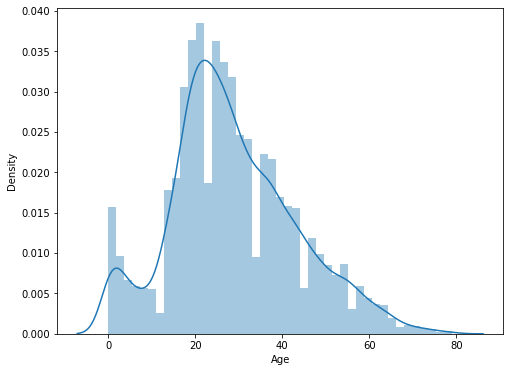

mean_absolute_error 11.65554903112155
mean_squared_error 217.70628302994717
r2_score -0.005608800474960374


C:\Users\TimK\AppData\Local\Temp\ipykernel_6348\756550187.py:85: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  conc = pd.DataFrame(Age_filler['Age'].append(put_to['Age'],
C:\Users\TimK\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


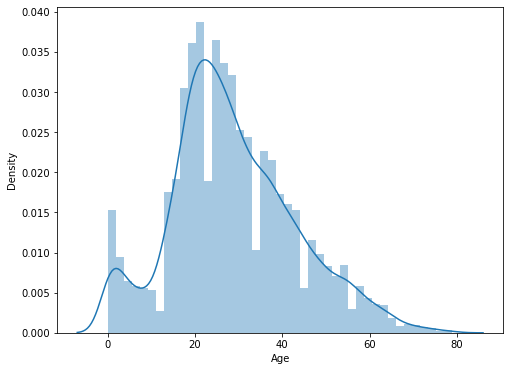

C:\Users\TimK\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


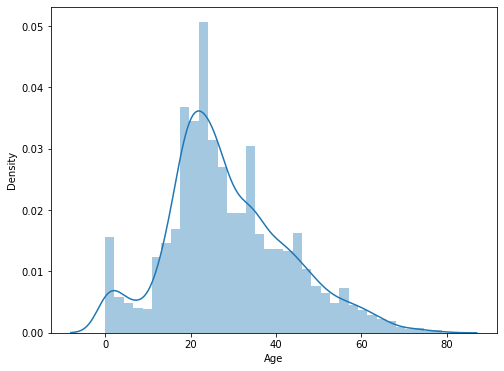

mean_absolute_error 11.019570405727924
mean_squared_error 198.57365155131265
r2_score -0.0692856186707993


C:\Users\TimK\AppData\Local\Temp\ipykernel_6348\756550187.py:180: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  conc = pd.DataFrame(Age_filler['Age'].append(put_to['Age'],
C:\Users\TimK\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\TimK\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


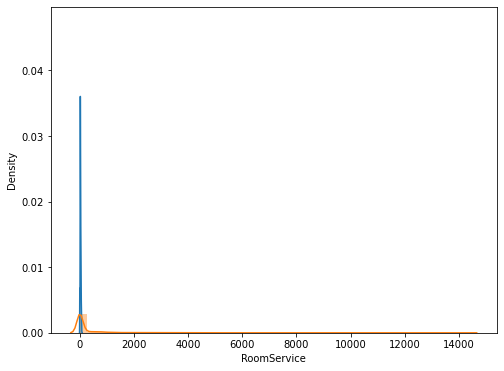

mean_absolute_error 253.63805049911917
mean_squared_error 341134.0132002349
r2_score 0.06256263955168928


C:\Users\TimK\AppData\Local\Temp\ipykernel_6348\756550187.py:273: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  conc = pd.DataFrame(RoomService_filler['RoomService'].append(put_to['RoomService'],
C:\Users\TimK\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


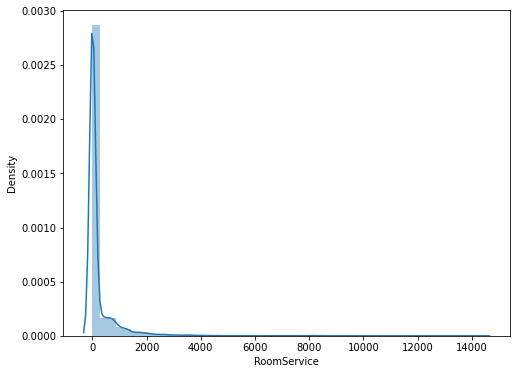

C:\Users\TimK\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


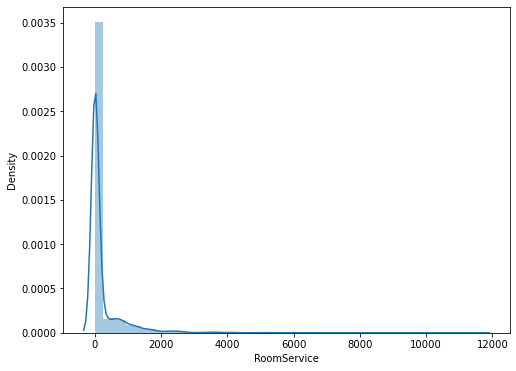

mean_absolute_error 259.8941597139452
mean_squared_error 351667.27771156136
r2_score -0.023742307060312662


C:\Users\TimK\AppData\Local\Temp\ipykernel_6348\756550187.py:368: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  conc = pd.DataFrame(RoomService_filler['RoomService'].append(put_to['RoomService'],
C:\Users\TimK\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\TimK\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


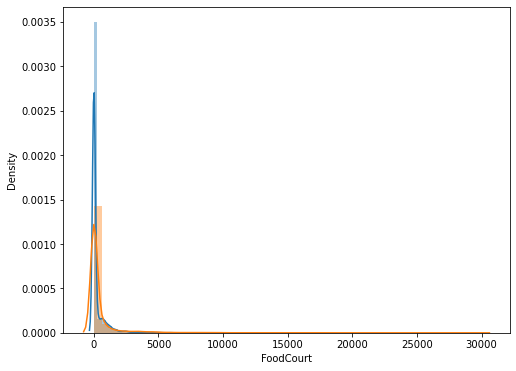

mean_absolute_error 485.3625146886017
mean_squared_error 1753608.355041128
r2_score 0.10605435980661637


C:\Users\TimK\AppData\Local\Temp\ipykernel_6348\756550187.py:461: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  conc = pd.DataFrame(FoodCourt_filler['FoodCourt'].append(put_to['FoodCourt'],
C:\Users\TimK\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


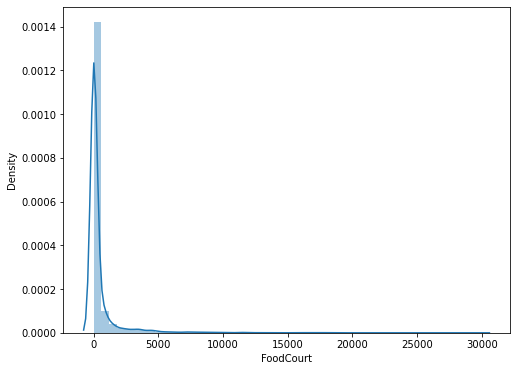

C:\Users\TimK\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


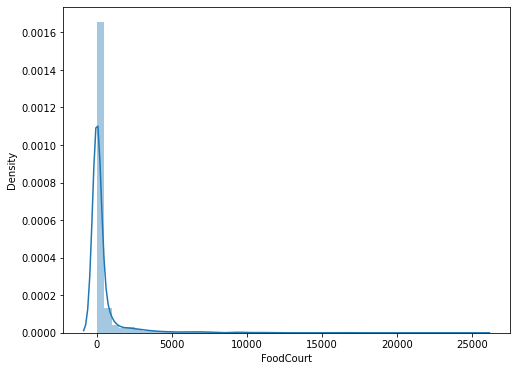

mean_absolute_error 484.15161676646704
mean_squared_error 1510299.3153053892
r2_score 0.08369409014401641


C:\Users\TimK\AppData\Local\Temp\ipykernel_6348\756550187.py:556: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  conc = pd.DataFrame(FoodCourt_filler['FoodCourt'].append(put_to['FoodCourt'],
C:\Users\TimK\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\TimK\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


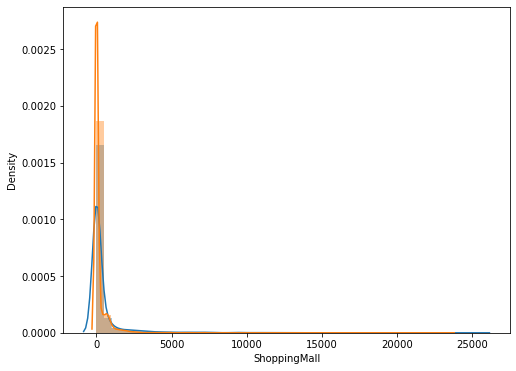

mean_absolute_error 213.13647613435472
mean_squared_error 323670.0489098409
r2_score -0.07053041885065592


C:\Users\TimK\AppData\Local\Temp\ipykernel_6348\756550187.py:649: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  conc = pd.DataFrame(ShoppingMall_filler['ShoppingMall'].append(put_to['ShoppingMall'],
C:\Users\TimK\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


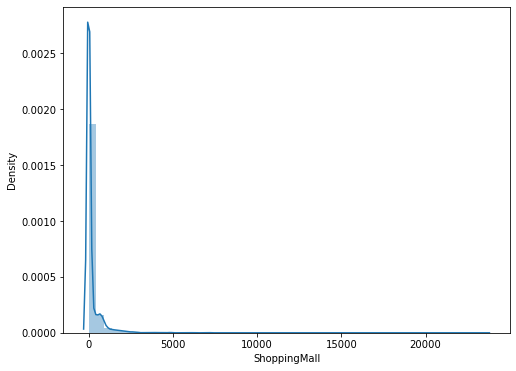

C:\Users\TimK\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


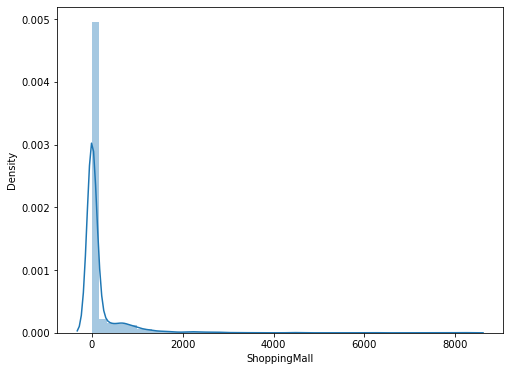

mean_absolute_error 205.34928229665073
mean_squared_error 299599.44784689
r2_score 0.015670395187153074


C:\Users\TimK\AppData\Local\Temp\ipykernel_6348\756550187.py:744: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  conc = pd.DataFrame(ShoppingMall_filler['ShoppingMall'].append(put_to['ShoppingMall'],
C:\Users\TimK\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\TimK\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


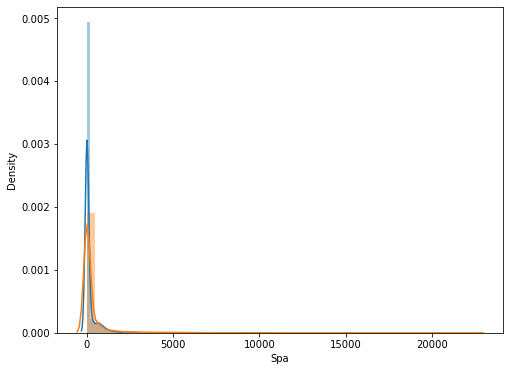

mean_absolute_error 352.6418331374853
mean_squared_error 854285.8328084606
r2_score -0.01634162794591809


C:\Users\TimK\AppData\Local\Temp\ipykernel_6348\756550187.py:837: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  conc = pd.DataFrame(Spa_filler['Spa'].append(put_to['Spa'],
C:\Users\TimK\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


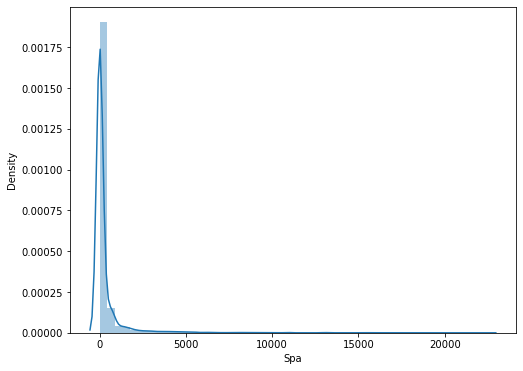

C:\Users\TimK\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


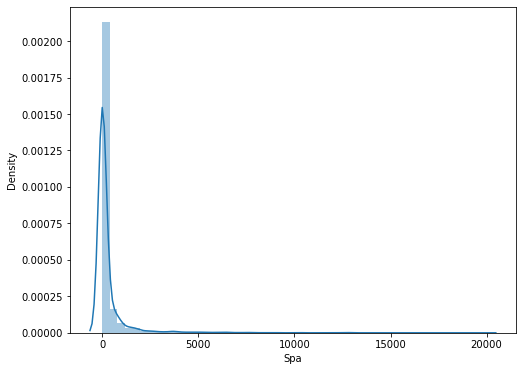

mean_absolute_error 348.3299043062201
mean_squared_error 768842.4929665072
r2_score 0.11533809685648921


C:\Users\TimK\AppData\Local\Temp\ipykernel_6348\756550187.py:932: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  conc = pd.DataFrame(Spa_filler['Spa'].append(put_to['Spa'],
C:\Users\TimK\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\TimK\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


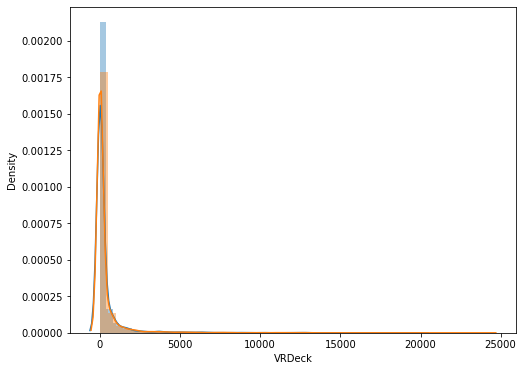

mean_absolute_error 369.23303938859493
mean_squared_error 1074415.9696413875
r2_score 0.03024435715375895


C:\Users\TimK\AppData\Local\Temp\ipykernel_6348\756550187.py:1025: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  conc = pd.DataFrame(VRDeck_filler['VRDeck'].append(put_to['VRDeck'],
C:\Users\TimK\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


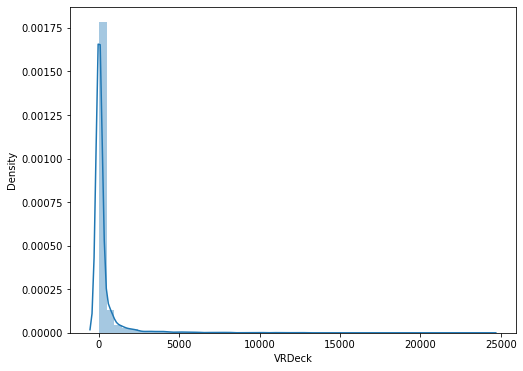

C:\Users\TimK\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


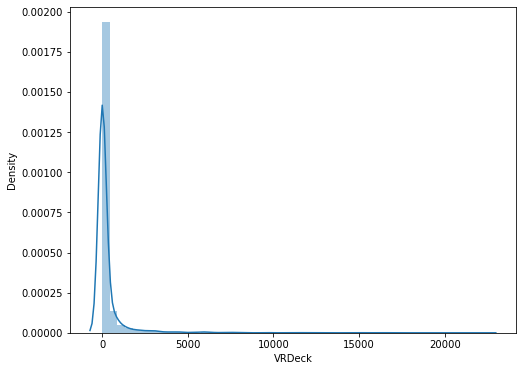

mean_absolute_error 357.7552380952381
mean_squared_error 1215059.4087619048
r2_score -0.021936294285865188


C:\Users\TimK\AppData\Local\Temp\ipykernel_6348\756550187.py:1120: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  conc = pd.DataFrame(VRDeck_filler['VRDeck'].append(put_to['VRDeck'],
C:\Users\TimK\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='VRDeck', ylabel='Density'>

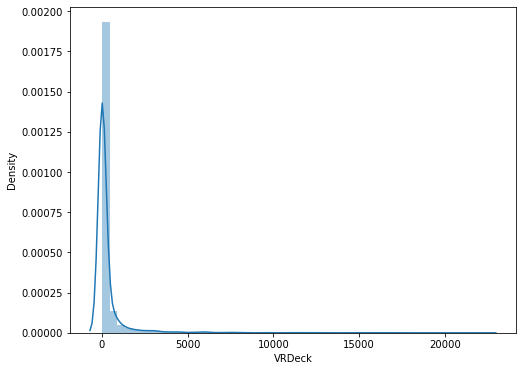

In [30]:
# KNN Imputation on df['Age']
sns.distplot(df['Age'])
plt.show()

df['Age'] = df['Age'].fillna(-537)
Age_filler = df.drop(list(df[df['Age'] == (-537)].index), axis=0)

Age_begin = df.drop(list(df[df['Age'] != (-537)].index), axis=0)

X_Age_final = Age_filler.drop('Age', axis=1)

y_Age_final = Age_filler['Age']

X_Age_to_insert = Age_begin.drop('Age', axis=1)

X_Age_final = pd.get_dummies(X_Age_final)
X_Age_to_insert_final = pd.get_dummies(X_Age_to_insert)

train_cols = X_Age_final.columns
test_cols = X_Age_to_insert_final.columns
common_cols = train_cols.intersection(test_cols)
train_not_test = train_cols.difference(test_cols)

X_Age_final = X_Age_final.drop(list(train_not_test),axis=1)

train_cols = X_Age_to_insert_final.columns
test_cols = X_Age_final.columns
common_cols = train_cols.intersection(test_cols)
train_not_test = train_cols.difference(test_cols)

X_Age_to_insert_final = X_Age_to_insert_final.drop(list(train_not_test),axis=1)

imp = SimpleImputer(missing_values=np.nan, strategy='median')

imp.fit(X_Age_final)

old_ind = X_Age_final.index

X_Age_final = imp.transform(X_Age_final)

X_Age_final = pd.DataFrame(X_Age_final)
featnam = list(imp.feature_names_in_)
for i in range(len(featnam)):
    X_Age_final = X_Age_final.rename(columns={i:featnam[i]})

X_Age_final['index1'] = old_ind
X_Age_final = X_Age_final.set_index('index1')

X_Age_final.index.name = None

old_ind = X_Age_to_insert_final.index
X_Age_to_insert_final= imp.transform(X_Age_to_insert_final)

X_Age_to_insert_final= pd.DataFrame(X_Age_to_insert_final)
featnam = list(imp.feature_names_in_)
for i in range(len(featnam)):
    X_Age_to_insert_final = X_Age_to_insert_final.rename(columns={i:featnam[i]})

X_Age_to_insert_final['index1'] = old_ind
X_Age_to_insert_final = X_Age_to_insert_final.set_index('index1')

X_Age_to_insert_final.index.name = None

X_Age_train, X_Age_test, y_Age_train, y_Age_test = train_test_split(X_Age_final, y_Age_final, test_size=0.2, random_state=17)

knnreg = KNeighborsRegressor()
knnreg.fit(X_Age_train, y_Age_train)

knnreg.score(X_Age_test, y_Age_test)

print(f"mean_absolute_error {mean_absolute_error(y_Age_test, knnreg.predict(X_Age_test))}")
print(f"mean_squared_error {mean_squared_error(y_Age_test, knnreg.predict(X_Age_test))}")
print(f"r2_score {r2_score(y_Age_test, knnreg.predict(X_Age_test))}")

put_to = pd.DataFrame(knnreg.predict(X_Age_to_insert_final))

put_to['index1'] = Age_begin.index
put_to = put_to.set_index('index1') 

put_to = put_to.rename(columns={0:'Age'})
put_to.index.name = None

Age_final = Age_begin.copy()

conc = pd.DataFrame(Age_filler['Age'].append(put_to['Age'], 
                  ignore_index = False),columns=['Age'])

conc = conc.sort_index(axis=0)

df['Age'] = conc['Age']

sns.distplot(df['Age'])
plt.show()

# KNN Imputation on sub['Age']

sns.distplot(sub['Age'])
plt.show()

sub['Age'] = sub['Age'].fillna(-537)
Age_filler = sub.drop(list(sub[sub['Age'] == (-537)].index), axis=0)

Age_begin = sub.drop(list(sub[sub['Age'] != (-537)].index), axis=0)

X_Age_final = Age_filler.drop('Age', axis=1)

y_Age_final = Age_filler['Age']

X_Age_to_insert = Age_begin.drop('Age', axis=1)

X_Age_final = pd.get_dummies(X_Age_final)
X_Age_to_insert_final = pd.get_dummies(X_Age_to_insert)

train_cols = X_Age_final.columns
test_cols = X_Age_to_insert_final.columns
common_cols = train_cols.intersection(test_cols)
train_not_test = train_cols.difference(test_cols)

X_Age_final = X_Age_final.drop(list(train_not_test),axis=1)

train_cols = X_Age_to_insert_final.columns
test_cols = X_Age_final.columns
common_cols = train_cols.intersection(test_cols)
train_not_test = train_cols.difference(test_cols)

X_Age_to_insert_final = X_Age_to_insert_final.drop(list(train_not_test),axis=1)

imp = SimpleImputer(missing_values=np.nan, strategy='median')

imp.fit(X_Age_final)

old_ind = X_Age_final.index

X_Age_final = imp.transform(X_Age_final)

X_Age_final = pd.DataFrame(X_Age_final)
featnam = list(imp.feature_names_in_)
for i in range(len(featnam)):
    X_Age_final = X_Age_final.rename(columns={i:featnam[i]})

X_Age_final['index1'] = old_ind
X_Age_final = X_Age_final.set_index('index1')

X_Age_final.index.name = None

old_ind = X_Age_to_insert_final.index
X_Age_to_insert_final= imp.transform(X_Age_to_insert_final)

X_Age_to_insert_final= pd.DataFrame(X_Age_to_insert_final)
featnam = list(imp.feature_names_in_)
for i in range(len(featnam)):
    X_Age_to_insert_final = X_Age_to_insert_final.rename(columns={i:featnam[i]})

X_Age_to_insert_final['index1'] = old_ind
X_Age_to_insert_final = X_Age_to_insert_final.set_index('index1')

X_Age_to_insert_final.index.name = None

X_Age_train, X_Age_test, y_Age_train, y_Age_test = train_test_split(X_Age_final, y_Age_final, test_size=0.2, random_state=17)

knnreg = KNeighborsRegressor()
knnreg.fit(X_Age_train, y_Age_train)

knnreg.score(X_Age_test, y_Age_test)

print(f"mean_absolute_error {mean_absolute_error(y_Age_test, knnreg.predict(X_Age_test))}")
print(f"mean_squared_error {mean_squared_error(y_Age_test, knnreg.predict(X_Age_test))}")
print(f"r2_score {r2_score(y_Age_test, knnreg.predict(X_Age_test))}")

put_to = pd.DataFrame(knnreg.predict(X_Age_to_insert_final))

put_to['index1'] = Age_begin.index
put_to = put_to.set_index('index1') 

put_to = put_to.rename(columns={0:'Age'})
put_to.index.name = None

Age_final = Age_begin.copy()

conc = pd.DataFrame(Age_filler['Age'].append(put_to['Age'], 
                  ignore_index = False),columns=['Age'])

conc = conc.sort_index(axis=0)

sub['Age'] = conc['Age']

sns.distplot(sub['Age'])

# KNN Imputation on df['RoomService']
sns.distplot(df['RoomService'])
plt.show()

df['RoomService'] = df['RoomService'].fillna(-537)
RoomService_filler = df.drop(list(df[df['RoomService'] == (-537)].index), axis=0)

RoomService_begin = df.drop(list(df[df['RoomService'] != (-537)].index), axis=0)

X_RoomService_final = RoomService_filler.drop('RoomService', axis=1)

y_RoomService_final = RoomService_filler['RoomService']

X_RoomService_to_insert = RoomService_begin.drop('RoomService', axis=1)

X_RoomService_final = pd.get_dummies(X_RoomService_final)
X_RoomService_to_insert_final = pd.get_dummies(X_RoomService_to_insert)

train_cols = X_RoomService_final.columns
test_cols = X_RoomService_to_insert_final.columns
common_cols = train_cols.intersection(test_cols)
train_not_test = train_cols.difference(test_cols)

X_RoomService_final = X_RoomService_final.drop(list(train_not_test),axis=1)

train_cols = X_RoomService_to_insert_final.columns
test_cols = X_RoomService_final.columns
common_cols = train_cols.intersection(test_cols)
train_not_test = train_cols.difference(test_cols)

X_RoomService_to_insert_final = X_RoomService_to_insert_final.drop(list(train_not_test),axis=1)

imp = SimpleImputer(missing_values=np.nan, strategy='median')

imp.fit(X_RoomService_final)

old_ind = X_RoomService_final.index

X_RoomService_final = imp.transform(X_RoomService_final)

X_RoomService_final = pd.DataFrame(X_RoomService_final)
featnam = list(imp.feature_names_in_)
for i in range(len(featnam)):
    X_RoomService_final = X_RoomService_final.rename(columns={i:featnam[i]})

X_RoomService_final['index1'] = old_ind
X_RoomService_final = X_RoomService_final.set_index('index1')

X_RoomService_final.index.name = None

old_ind = X_RoomService_to_insert_final.index
X_RoomService_to_insert_final= imp.transform(X_RoomService_to_insert_final)

X_RoomService_to_insert_final= pd.DataFrame(X_RoomService_to_insert_final)
featnam = list(imp.feature_names_in_)
for i in range(len(featnam)):
    X_RoomService_to_insert_final = X_RoomService_to_insert_final.rename(columns={i:featnam[i]})

X_RoomService_to_insert_final['index1'] = old_ind
X_RoomService_to_insert_final = X_RoomService_to_insert_final.set_index('index1')

X_RoomService_to_insert_final.index.name = None

X_RoomService_train, X_RoomService_test, y_RoomService_train, y_RoomService_test = train_test_split(X_RoomService_final, y_RoomService_final, test_size=0.2, random_state=17)

knnreg = KNeighborsRegressor()
knnreg.fit(X_RoomService_train, y_RoomService_train)

knnreg.score(X_RoomService_test, y_RoomService_test)

print(f"mean_absolute_error {mean_absolute_error(y_RoomService_test, knnreg.predict(X_RoomService_test))}")
print(f"mean_squared_error {mean_squared_error(y_RoomService_test, knnreg.predict(X_RoomService_test))}")
print(f"r2_score {r2_score(y_RoomService_test, knnreg.predict(X_RoomService_test))}")

put_to = pd.DataFrame(knnreg.predict(X_RoomService_to_insert_final))

put_to['index1'] = RoomService_begin.index
put_to = put_to.set_index('index1') 

put_to = put_to.rename(columns={0:'RoomService'})
put_to.index.name = None

RoomService_final = RoomService_begin.copy()

conc = pd.DataFrame(RoomService_filler['RoomService'].append(put_to['RoomService'], 
                  ignore_index = False),columns=['RoomService'])

conc = conc.sort_index(axis=0)

df['RoomService'] = conc['RoomService']

sns.distplot(df['RoomService'])
plt.show()

# KNN Imputation on sub['RoomService']

sns.distplot(sub['RoomService'])
plt.show()

sub['RoomService'] = sub['RoomService'].fillna(-537)
RoomService_filler = sub.drop(list(sub[sub['RoomService'] == (-537)].index), axis=0)

RoomService_begin = sub.drop(list(sub[sub['RoomService'] != (-537)].index), axis=0)

X_RoomService_final = RoomService_filler.drop('RoomService', axis=1)

y_RoomService_final = RoomService_filler['RoomService']

X_RoomService_to_insert = RoomService_begin.drop('RoomService', axis=1)

X_RoomService_final = pd.get_dummies(X_RoomService_final)
X_RoomService_to_insert_final = pd.get_dummies(X_RoomService_to_insert)

train_cols = X_RoomService_final.columns
test_cols = X_RoomService_to_insert_final.columns
common_cols = train_cols.intersection(test_cols)
train_not_test = train_cols.difference(test_cols)

X_RoomService_final = X_RoomService_final.drop(list(train_not_test),axis=1)

train_cols = X_RoomService_to_insert_final.columns
test_cols = X_RoomService_final.columns
common_cols = train_cols.intersection(test_cols)
train_not_test = train_cols.difference(test_cols)

X_RoomService_to_insert_final = X_RoomService_to_insert_final.drop(list(train_not_test),axis=1)

imp = SimpleImputer(missing_values=np.nan, strategy='median')

imp.fit(X_RoomService_final)

old_ind = X_RoomService_final.index

X_RoomService_final = imp.transform(X_RoomService_final)

X_RoomService_final = pd.DataFrame(X_RoomService_final)
featnam = list(imp.feature_names_in_)
for i in range(len(featnam)):
    X_RoomService_final = X_RoomService_final.rename(columns={i:featnam[i]})

X_RoomService_final['index1'] = old_ind
X_RoomService_final = X_RoomService_final.set_index('index1')

X_RoomService_final.index.name = None

old_ind = X_RoomService_to_insert_final.index
X_RoomService_to_insert_final= imp.transform(X_RoomService_to_insert_final)

X_RoomService_to_insert_final= pd.DataFrame(X_RoomService_to_insert_final)
featnam = list(imp.feature_names_in_)
for i in range(len(featnam)):
    X_RoomService_to_insert_final = X_RoomService_to_insert_final.rename(columns={i:featnam[i]})

X_RoomService_to_insert_final['index1'] = old_ind
X_RoomService_to_insert_final = X_RoomService_to_insert_final.set_index('index1')

X_RoomService_to_insert_final.index.name = None

X_RoomService_train, X_RoomService_test, y_RoomService_train, y_RoomService_test = train_test_split(X_RoomService_final, y_RoomService_final, test_size=0.2, random_state=17)

knnreg = KNeighborsRegressor()
knnreg.fit(X_RoomService_train, y_RoomService_train)

knnreg.score(X_RoomService_test, y_RoomService_test)

print(f"mean_absolute_error {mean_absolute_error(y_RoomService_test, knnreg.predict(X_RoomService_test))}")
print(f"mean_squared_error {mean_squared_error(y_RoomService_test, knnreg.predict(X_RoomService_test))}")
print(f"r2_score {r2_score(y_RoomService_test, knnreg.predict(X_RoomService_test))}")

put_to = pd.DataFrame(knnreg.predict(X_RoomService_to_insert_final))

put_to['index1'] = RoomService_begin.index
put_to = put_to.set_index('index1') 

put_to = put_to.rename(columns={0:'RoomService'})
put_to.index.name = None

RoomService_final = RoomService_begin.copy()

conc = pd.DataFrame(RoomService_filler['RoomService'].append(put_to['RoomService'], 
                  ignore_index = False),columns=['RoomService'])

conc = conc.sort_index(axis=0)

sub['RoomService'] = conc['RoomService']

sns.distplot(sub['RoomService'])

# KNN Imputation on df['FoodCourt']
sns.distplot(df['FoodCourt'])
plt.show()

df['FoodCourt'] = df['FoodCourt'].fillna(-537)
FoodCourt_filler = df.drop(list(df[df['FoodCourt'] == (-537)].index), axis=0)

FoodCourt_begin = df.drop(list(df[df['FoodCourt'] != (-537)].index), axis=0)

X_FoodCourt_final = FoodCourt_filler.drop('FoodCourt', axis=1)

y_FoodCourt_final = FoodCourt_filler['FoodCourt']

X_FoodCourt_to_insert = FoodCourt_begin.drop('FoodCourt', axis=1)

X_FoodCourt_final = pd.get_dummies(X_FoodCourt_final)
X_FoodCourt_to_insert_final = pd.get_dummies(X_FoodCourt_to_insert)

train_cols = X_FoodCourt_final.columns
test_cols = X_FoodCourt_to_insert_final.columns
common_cols = train_cols.intersection(test_cols)
train_not_test = train_cols.difference(test_cols)

X_FoodCourt_final = X_FoodCourt_final.drop(list(train_not_test),axis=1)

train_cols = X_FoodCourt_to_insert_final.columns
test_cols = X_FoodCourt_final.columns
common_cols = train_cols.intersection(test_cols)
train_not_test = train_cols.difference(test_cols)

X_FoodCourt_to_insert_final = X_FoodCourt_to_insert_final.drop(list(train_not_test),axis=1)

imp = SimpleImputer(missing_values=np.nan, strategy='median')

imp.fit(X_FoodCourt_final)

old_ind = X_FoodCourt_final.index

X_FoodCourt_final = imp.transform(X_FoodCourt_final)

X_FoodCourt_final = pd.DataFrame(X_FoodCourt_final)
featnam = list(imp.feature_names_in_)
for i in range(len(featnam)):
    X_FoodCourt_final = X_FoodCourt_final.rename(columns={i:featnam[i]})

X_FoodCourt_final['index1'] = old_ind
X_FoodCourt_final = X_FoodCourt_final.set_index('index1')

X_FoodCourt_final.index.name = None

old_ind = X_FoodCourt_to_insert_final.index
X_FoodCourt_to_insert_final= imp.transform(X_FoodCourt_to_insert_final)

X_FoodCourt_to_insert_final= pd.DataFrame(X_FoodCourt_to_insert_final)
featnam = list(imp.feature_names_in_)
for i in range(len(featnam)):
    X_FoodCourt_to_insert_final = X_FoodCourt_to_insert_final.rename(columns={i:featnam[i]})

X_FoodCourt_to_insert_final['index1'] = old_ind
X_FoodCourt_to_insert_final = X_FoodCourt_to_insert_final.set_index('index1')

X_FoodCourt_to_insert_final.index.name = None

X_FoodCourt_train, X_FoodCourt_test, y_FoodCourt_train, y_FoodCourt_test = train_test_split(X_FoodCourt_final, y_FoodCourt_final, test_size=0.2, random_state=17)

knnreg = KNeighborsRegressor()
knnreg.fit(X_FoodCourt_train, y_FoodCourt_train)

knnreg.score(X_FoodCourt_test, y_FoodCourt_test)

print(f"mean_absolute_error {mean_absolute_error(y_FoodCourt_test, knnreg.predict(X_FoodCourt_test))}")
print(f"mean_squared_error {mean_squared_error(y_FoodCourt_test, knnreg.predict(X_FoodCourt_test))}")
print(f"r2_score {r2_score(y_FoodCourt_test, knnreg.predict(X_FoodCourt_test))}")

put_to = pd.DataFrame(knnreg.predict(X_FoodCourt_to_insert_final))

put_to['index1'] = FoodCourt_begin.index
put_to = put_to.set_index('index1') 

put_to = put_to.rename(columns={0:'FoodCourt'})
put_to.index.name = None

FoodCourt_final = FoodCourt_begin.copy()

conc = pd.DataFrame(FoodCourt_filler['FoodCourt'].append(put_to['FoodCourt'], 
                  ignore_index = False),columns=['FoodCourt'])

conc = conc.sort_index(axis=0)

df['FoodCourt'] = conc['FoodCourt']

sns.distplot(df['FoodCourt'])
plt.show()

# KNN Imputation on sub['FoodCourt']

sns.distplot(sub['FoodCourt'])
plt.show()

sub['FoodCourt'] = sub['FoodCourt'].fillna(-537)
FoodCourt_filler = sub.drop(list(sub[sub['FoodCourt'] == (-537)].index), axis=0)

FoodCourt_begin = sub.drop(list(sub[sub['FoodCourt'] != (-537)].index), axis=0)

X_FoodCourt_final = FoodCourt_filler.drop('FoodCourt', axis=1)

y_FoodCourt_final = FoodCourt_filler['FoodCourt']

X_FoodCourt_to_insert = FoodCourt_begin.drop('FoodCourt', axis=1)

X_FoodCourt_final = pd.get_dummies(X_FoodCourt_final)
X_FoodCourt_to_insert_final = pd.get_dummies(X_FoodCourt_to_insert)

train_cols = X_FoodCourt_final.columns
test_cols = X_FoodCourt_to_insert_final.columns
common_cols = train_cols.intersection(test_cols)
train_not_test = train_cols.difference(test_cols)

X_FoodCourt_final = X_FoodCourt_final.drop(list(train_not_test),axis=1)

train_cols = X_FoodCourt_to_insert_final.columns
test_cols = X_FoodCourt_final.columns
common_cols = train_cols.intersection(test_cols)
train_not_test = train_cols.difference(test_cols)

X_FoodCourt_to_insert_final = X_FoodCourt_to_insert_final.drop(list(train_not_test),axis=1)

imp = SimpleImputer(missing_values=np.nan, strategy='median')

imp.fit(X_FoodCourt_final)

old_ind = X_FoodCourt_final.index

X_FoodCourt_final = imp.transform(X_FoodCourt_final)

X_FoodCourt_final = pd.DataFrame(X_FoodCourt_final)
featnam = list(imp.feature_names_in_)
for i in range(len(featnam)):
    X_FoodCourt_final = X_FoodCourt_final.rename(columns={i:featnam[i]})

X_FoodCourt_final['index1'] = old_ind
X_FoodCourt_final = X_FoodCourt_final.set_index('index1')

X_FoodCourt_final.index.name = None

old_ind = X_FoodCourt_to_insert_final.index
X_FoodCourt_to_insert_final= imp.transform(X_FoodCourt_to_insert_final)

X_FoodCourt_to_insert_final= pd.DataFrame(X_FoodCourt_to_insert_final)
featnam = list(imp.feature_names_in_)
for i in range(len(featnam)):
    X_FoodCourt_to_insert_final = X_FoodCourt_to_insert_final.rename(columns={i:featnam[i]})

X_FoodCourt_to_insert_final['index1'] = old_ind
X_FoodCourt_to_insert_final = X_FoodCourt_to_insert_final.set_index('index1')

X_FoodCourt_to_insert_final.index.name = None

X_FoodCourt_train, X_FoodCourt_test, y_FoodCourt_train, y_FoodCourt_test = train_test_split(X_FoodCourt_final, y_FoodCourt_final, test_size=0.2, random_state=17)

knnreg = KNeighborsRegressor()
knnreg.fit(X_FoodCourt_train, y_FoodCourt_train)

knnreg.score(X_FoodCourt_test, y_FoodCourt_test)

print(f"mean_absolute_error {mean_absolute_error(y_FoodCourt_test, knnreg.predict(X_FoodCourt_test))}")
print(f"mean_squared_error {mean_squared_error(y_FoodCourt_test, knnreg.predict(X_FoodCourt_test))}")
print(f"r2_score {r2_score(y_FoodCourt_test, knnreg.predict(X_FoodCourt_test))}")

put_to = pd.DataFrame(knnreg.predict(X_FoodCourt_to_insert_final))

put_to['index1'] = FoodCourt_begin.index
put_to = put_to.set_index('index1') 

put_to = put_to.rename(columns={0:'FoodCourt'})
put_to.index.name = None

FoodCourt_final = FoodCourt_begin.copy()

conc = pd.DataFrame(FoodCourt_filler['FoodCourt'].append(put_to['FoodCourt'], 
                  ignore_index = False),columns=['FoodCourt'])

conc = conc.sort_index(axis=0)

sub['FoodCourt'] = conc['FoodCourt']

sns.distplot(sub['FoodCourt'])

# KNN Imputation on df['ShoppingMall']
sns.distplot(df['ShoppingMall'])
plt.show()

df['ShoppingMall'] = df['ShoppingMall'].fillna(-537)
ShoppingMall_filler = df.drop(list(df[df['ShoppingMall'] == (-537)].index), axis=0)

ShoppingMall_begin = df.drop(list(df[df['ShoppingMall'] != (-537)].index), axis=0)

X_ShoppingMall_final = ShoppingMall_filler.drop('ShoppingMall', axis=1)

y_ShoppingMall_final = ShoppingMall_filler['ShoppingMall']

X_ShoppingMall_to_insert = ShoppingMall_begin.drop('ShoppingMall', axis=1)

X_ShoppingMall_final = pd.get_dummies(X_ShoppingMall_final)
X_ShoppingMall_to_insert_final = pd.get_dummies(X_ShoppingMall_to_insert)

train_cols = X_ShoppingMall_final.columns
test_cols = X_ShoppingMall_to_insert_final.columns
common_cols = train_cols.intersection(test_cols)
train_not_test = train_cols.difference(test_cols)

X_ShoppingMall_final = X_ShoppingMall_final.drop(list(train_not_test),axis=1)

train_cols = X_ShoppingMall_to_insert_final.columns
test_cols = X_ShoppingMall_final.columns
common_cols = train_cols.intersection(test_cols)
train_not_test = train_cols.difference(test_cols)

X_ShoppingMall_to_insert_final = X_ShoppingMall_to_insert_final.drop(list(train_not_test),axis=1)

imp = SimpleImputer(missing_values=np.nan, strategy='median')

imp.fit(X_ShoppingMall_final)

old_ind = X_ShoppingMall_final.index

X_ShoppingMall_final = imp.transform(X_ShoppingMall_final)

X_ShoppingMall_final = pd.DataFrame(X_ShoppingMall_final)
featnam = list(imp.feature_names_in_)
for i in range(len(featnam)):
    X_ShoppingMall_final = X_ShoppingMall_final.rename(columns={i:featnam[i]})

X_ShoppingMall_final['index1'] = old_ind
X_ShoppingMall_final = X_ShoppingMall_final.set_index('index1')

X_ShoppingMall_final.index.name = None

old_ind = X_ShoppingMall_to_insert_final.index
X_ShoppingMall_to_insert_final= imp.transform(X_ShoppingMall_to_insert_final)

X_ShoppingMall_to_insert_final= pd.DataFrame(X_ShoppingMall_to_insert_final)
featnam = list(imp.feature_names_in_)
for i in range(len(featnam)):
    X_ShoppingMall_to_insert_final = X_ShoppingMall_to_insert_final.rename(columns={i:featnam[i]})

X_ShoppingMall_to_insert_final['index1'] = old_ind
X_ShoppingMall_to_insert_final = X_ShoppingMall_to_insert_final.set_index('index1')

X_ShoppingMall_to_insert_final.index.name = None

X_ShoppingMall_train, X_ShoppingMall_test, y_ShoppingMall_train, y_ShoppingMall_test = train_test_split(X_ShoppingMall_final, y_ShoppingMall_final, test_size=0.2, random_state=17)

knnreg = KNeighborsRegressor()
knnreg.fit(X_ShoppingMall_train, y_ShoppingMall_train)

knnreg.score(X_ShoppingMall_test, y_ShoppingMall_test)

print(f"mean_absolute_error {mean_absolute_error(y_ShoppingMall_test, knnreg.predict(X_ShoppingMall_test))}")
print(f"mean_squared_error {mean_squared_error(y_ShoppingMall_test, knnreg.predict(X_ShoppingMall_test))}")
print(f"r2_score {r2_score(y_ShoppingMall_test, knnreg.predict(X_ShoppingMall_test))}")

put_to = pd.DataFrame(knnreg.predict(X_ShoppingMall_to_insert_final))

put_to['index1'] = ShoppingMall_begin.index
put_to = put_to.set_index('index1') 

put_to = put_to.rename(columns={0:'ShoppingMall'})
put_to.index.name = None

ShoppingMall_final = ShoppingMall_begin.copy()

conc = pd.DataFrame(ShoppingMall_filler['ShoppingMall'].append(put_to['ShoppingMall'], 
                  ignore_index = False),columns=['ShoppingMall'])

conc = conc.sort_index(axis=0)

df['ShoppingMall'] = conc['ShoppingMall']

sns.distplot(df['ShoppingMall'])
plt.show()

# KNN Imputation on sub['ShoppingMall']

sns.distplot(sub['ShoppingMall'])
plt.show()

sub['ShoppingMall'] = sub['ShoppingMall'].fillna(-537)
ShoppingMall_filler = sub.drop(list(sub[sub['ShoppingMall'] == (-537)].index), axis=0)

ShoppingMall_begin = sub.drop(list(sub[sub['ShoppingMall'] != (-537)].index), axis=0)

X_ShoppingMall_final = ShoppingMall_filler.drop('ShoppingMall', axis=1)

y_ShoppingMall_final = ShoppingMall_filler['ShoppingMall']

X_ShoppingMall_to_insert = ShoppingMall_begin.drop('ShoppingMall', axis=1)

X_ShoppingMall_final = pd.get_dummies(X_ShoppingMall_final)
X_ShoppingMall_to_insert_final = pd.get_dummies(X_ShoppingMall_to_insert)

train_cols = X_ShoppingMall_final.columns
test_cols = X_ShoppingMall_to_insert_final.columns
common_cols = train_cols.intersection(test_cols)
train_not_test = train_cols.difference(test_cols)

X_ShoppingMall_final = X_ShoppingMall_final.drop(list(train_not_test),axis=1)

train_cols = X_ShoppingMall_to_insert_final.columns
test_cols = X_ShoppingMall_final.columns
common_cols = train_cols.intersection(test_cols)
train_not_test = train_cols.difference(test_cols)

X_ShoppingMall_to_insert_final = X_ShoppingMall_to_insert_final.drop(list(train_not_test),axis=1)

imp = SimpleImputer(missing_values=np.nan, strategy='median')

imp.fit(X_ShoppingMall_final)

old_ind = X_ShoppingMall_final.index

X_ShoppingMall_final = imp.transform(X_ShoppingMall_final)

X_ShoppingMall_final = pd.DataFrame(X_ShoppingMall_final)
featnam = list(imp.feature_names_in_)
for i in range(len(featnam)):
    X_ShoppingMall_final = X_ShoppingMall_final.rename(columns={i:featnam[i]})

X_ShoppingMall_final['index1'] = old_ind
X_ShoppingMall_final = X_ShoppingMall_final.set_index('index1')

X_ShoppingMall_final.index.name = None

old_ind = X_ShoppingMall_to_insert_final.index
X_ShoppingMall_to_insert_final= imp.transform(X_ShoppingMall_to_insert_final)

X_ShoppingMall_to_insert_final= pd.DataFrame(X_ShoppingMall_to_insert_final)
featnam = list(imp.feature_names_in_)
for i in range(len(featnam)):
    X_ShoppingMall_to_insert_final = X_ShoppingMall_to_insert_final.rename(columns={i:featnam[i]})

X_ShoppingMall_to_insert_final['index1'] = old_ind
X_ShoppingMall_to_insert_final = X_ShoppingMall_to_insert_final.set_index('index1')

X_ShoppingMall_to_insert_final.index.name = None

X_ShoppingMall_train, X_ShoppingMall_test, y_ShoppingMall_train, y_ShoppingMall_test = train_test_split(X_ShoppingMall_final, y_ShoppingMall_final, test_size=0.2, random_state=17)

knnreg = KNeighborsRegressor()
knnreg.fit(X_ShoppingMall_train, y_ShoppingMall_train)

knnreg.score(X_ShoppingMall_test, y_ShoppingMall_test)

print(f"mean_absolute_error {mean_absolute_error(y_ShoppingMall_test, knnreg.predict(X_ShoppingMall_test))}")
print(f"mean_squared_error {mean_squared_error(y_ShoppingMall_test, knnreg.predict(X_ShoppingMall_test))}")
print(f"r2_score {r2_score(y_ShoppingMall_test, knnreg.predict(X_ShoppingMall_test))}")

put_to = pd.DataFrame(knnreg.predict(X_ShoppingMall_to_insert_final))

put_to['index1'] = ShoppingMall_begin.index
put_to = put_to.set_index('index1') 

put_to = put_to.rename(columns={0:'ShoppingMall'})
put_to.index.name = None

ShoppingMall_final = ShoppingMall_begin.copy()

conc = pd.DataFrame(ShoppingMall_filler['ShoppingMall'].append(put_to['ShoppingMall'], 
                  ignore_index = False),columns=['ShoppingMall'])

conc = conc.sort_index(axis=0)

sub['ShoppingMall'] = conc['ShoppingMall']

sns.distplot(sub['ShoppingMall'])

# KNN Imputation on df['Spa']
sns.distplot(df['Spa'])
plt.show()

df['Spa'] = df['Spa'].fillna(-537)
Spa_filler = df.drop(list(df[df['Spa'] == (-537)].index), axis=0)

Spa_begin = df.drop(list(df[df['Spa'] != (-537)].index), axis=0)

X_Spa_final = Spa_filler.drop('Spa', axis=1)

y_Spa_final = Spa_filler['Spa']

X_Spa_to_insert = Spa_begin.drop('Spa', axis=1)

X_Spa_final = pd.get_dummies(X_Spa_final)
X_Spa_to_insert_final = pd.get_dummies(X_Spa_to_insert)

train_cols = X_Spa_final.columns
test_cols = X_Spa_to_insert_final.columns
common_cols = train_cols.intersection(test_cols)
train_not_test = train_cols.difference(test_cols)

X_Spa_final = X_Spa_final.drop(list(train_not_test),axis=1)

train_cols = X_Spa_to_insert_final.columns
test_cols = X_Spa_final.columns
common_cols = train_cols.intersection(test_cols)
train_not_test = train_cols.difference(test_cols)

X_Spa_to_insert_final = X_Spa_to_insert_final.drop(list(train_not_test),axis=1)

imp = SimpleImputer(missing_values=np.nan, strategy='median')

imp.fit(X_Spa_final)

old_ind = X_Spa_final.index

X_Spa_final = imp.transform(X_Spa_final)

X_Spa_final = pd.DataFrame(X_Spa_final)
featnam = list(imp.feature_names_in_)
for i in range(len(featnam)):
    X_Spa_final = X_Spa_final.rename(columns={i:featnam[i]})

X_Spa_final['index1'] = old_ind
X_Spa_final = X_Spa_final.set_index('index1')

X_Spa_final.index.name = None

old_ind = X_Spa_to_insert_final.index
X_Spa_to_insert_final= imp.transform(X_Spa_to_insert_final)

X_Spa_to_insert_final= pd.DataFrame(X_Spa_to_insert_final)
featnam = list(imp.feature_names_in_)
for i in range(len(featnam)):
    X_Spa_to_insert_final = X_Spa_to_insert_final.rename(columns={i:featnam[i]})

X_Spa_to_insert_final['index1'] = old_ind
X_Spa_to_insert_final = X_Spa_to_insert_final.set_index('index1')

X_Spa_to_insert_final.index.name = None

X_Spa_train, X_Spa_test, y_Spa_train, y_Spa_test = train_test_split(X_Spa_final, y_Spa_final, test_size=0.2, random_state=17)

knnreg = KNeighborsRegressor()
knnreg.fit(X_Spa_train, y_Spa_train)

knnreg.score(X_Spa_test, y_Spa_test)

print(f"mean_absolute_error {mean_absolute_error(y_Spa_test, knnreg.predict(X_Spa_test))}")
print(f"mean_squared_error {mean_squared_error(y_Spa_test, knnreg.predict(X_Spa_test))}")
print(f"r2_score {r2_score(y_Spa_test, knnreg.predict(X_Spa_test))}")

put_to = pd.DataFrame(knnreg.predict(X_Spa_to_insert_final))

put_to['index1'] = Spa_begin.index
put_to = put_to.set_index('index1') 

put_to = put_to.rename(columns={0:'Spa'})
put_to.index.name = None

Spa_final = Spa_begin.copy()

conc = pd.DataFrame(Spa_filler['Spa'].append(put_to['Spa'], 
                  ignore_index = False),columns=['Spa'])

conc = conc.sort_index(axis=0)

df['Spa'] = conc['Spa']

sns.distplot(df['Spa'])
plt.show()

# KNN Imputation on sub['Spa']

sns.distplot(sub['Spa'])
plt.show()

sub['Spa'] = sub['Spa'].fillna(-537)
Spa_filler = sub.drop(list(sub[sub['Spa'] == (-537)].index), axis=0)

Spa_begin = sub.drop(list(sub[sub['Spa'] != (-537)].index), axis=0)

X_Spa_final = Spa_filler.drop('Spa', axis=1)

y_Spa_final = Spa_filler['Spa']

X_Spa_to_insert = Spa_begin.drop('Spa', axis=1)

X_Spa_final = pd.get_dummies(X_Spa_final)
X_Spa_to_insert_final = pd.get_dummies(X_Spa_to_insert)

train_cols = X_Spa_final.columns
test_cols = X_Spa_to_insert_final.columns
common_cols = train_cols.intersection(test_cols)
train_not_test = train_cols.difference(test_cols)

X_Spa_final = X_Spa_final.drop(list(train_not_test),axis=1)

train_cols = X_Spa_to_insert_final.columns
test_cols = X_Spa_final.columns
common_cols = train_cols.intersection(test_cols)
train_not_test = train_cols.difference(test_cols)

X_Spa_to_insert_final = X_Spa_to_insert_final.drop(list(train_not_test),axis=1)

imp = SimpleImputer(missing_values=np.nan, strategy='median')

imp.fit(X_Spa_final)

old_ind = X_Spa_final.index

X_Spa_final = imp.transform(X_Spa_final)

X_Spa_final = pd.DataFrame(X_Spa_final)
featnam = list(imp.feature_names_in_)
for i in range(len(featnam)):
    X_Spa_final = X_Spa_final.rename(columns={i:featnam[i]})

X_Spa_final['index1'] = old_ind
X_Spa_final = X_Spa_final.set_index('index1')

X_Spa_final.index.name = None

old_ind = X_Spa_to_insert_final.index
X_Spa_to_insert_final= imp.transform(X_Spa_to_insert_final)

X_Spa_to_insert_final= pd.DataFrame(X_Spa_to_insert_final)
featnam = list(imp.feature_names_in_)
for i in range(len(featnam)):
    X_Spa_to_insert_final = X_Spa_to_insert_final.rename(columns={i:featnam[i]})

X_Spa_to_insert_final['index1'] = old_ind
X_Spa_to_insert_final = X_Spa_to_insert_final.set_index('index1')

X_Spa_to_insert_final.index.name = None

X_Spa_train, X_Spa_test, y_Spa_train, y_Spa_test = train_test_split(X_Spa_final, y_Spa_final, test_size=0.2, random_state=17)

knnreg = KNeighborsRegressor()
knnreg.fit(X_Spa_train, y_Spa_train)

knnreg.score(X_Spa_test, y_Spa_test)

print(f"mean_absolute_error {mean_absolute_error(y_Spa_test, knnreg.predict(X_Spa_test))}")
print(f"mean_squared_error {mean_squared_error(y_Spa_test, knnreg.predict(X_Spa_test))}")
print(f"r2_score {r2_score(y_Spa_test, knnreg.predict(X_Spa_test))}")

put_to = pd.DataFrame(knnreg.predict(X_Spa_to_insert_final))

put_to['index1'] = Spa_begin.index
put_to = put_to.set_index('index1') 

put_to = put_to.rename(columns={0:'Spa'})
put_to.index.name = None

Spa_final = Spa_begin.copy()

conc = pd.DataFrame(Spa_filler['Spa'].append(put_to['Spa'], 
                  ignore_index = False),columns=['Spa'])

conc = conc.sort_index(axis=0)

sub['Spa'] = conc['Spa']

sns.distplot(sub['Spa'])

# KNN Imputation on df['VRDeck']
sns.distplot(df['VRDeck'])
plt.show()

df['VRDeck'] = df['VRDeck'].fillna(-537)
VRDeck_filler = df.drop(list(df[df['VRDeck'] == (-537)].index), axis=0)

VRDeck_begin = df.drop(list(df[df['VRDeck'] != (-537)].index), axis=0)

X_VRDeck_final = VRDeck_filler.drop('VRDeck', axis=1)

y_VRDeck_final = VRDeck_filler['VRDeck']

X_VRDeck_to_insert = VRDeck_begin.drop('VRDeck', axis=1)

X_VRDeck_final = pd.get_dummies(X_VRDeck_final)
X_VRDeck_to_insert_final = pd.get_dummies(X_VRDeck_to_insert)

train_cols = X_VRDeck_final.columns
test_cols = X_VRDeck_to_insert_final.columns
common_cols = train_cols.intersection(test_cols)
train_not_test = train_cols.difference(test_cols)

X_VRDeck_final = X_VRDeck_final.drop(list(train_not_test),axis=1)

train_cols = X_VRDeck_to_insert_final.columns
test_cols = X_VRDeck_final.columns
common_cols = train_cols.intersection(test_cols)
train_not_test = train_cols.difference(test_cols)

X_VRDeck_to_insert_final = X_VRDeck_to_insert_final.drop(list(train_not_test),axis=1)

imp = SimpleImputer(missing_values=np.nan, strategy='median')

imp.fit(X_VRDeck_final)

old_ind = X_VRDeck_final.index

X_VRDeck_final = imp.transform(X_VRDeck_final)

X_VRDeck_final = pd.DataFrame(X_VRDeck_final)
featnam = list(imp.feature_names_in_)
for i in range(len(featnam)):
    X_VRDeck_final = X_VRDeck_final.rename(columns={i:featnam[i]})

X_VRDeck_final['index1'] = old_ind
X_VRDeck_final = X_VRDeck_final.set_index('index1')

X_VRDeck_final.index.name = None

old_ind = X_VRDeck_to_insert_final.index
X_VRDeck_to_insert_final= imp.transform(X_VRDeck_to_insert_final)

X_VRDeck_to_insert_final= pd.DataFrame(X_VRDeck_to_insert_final)
featnam = list(imp.feature_names_in_)
for i in range(len(featnam)):
    X_VRDeck_to_insert_final = X_VRDeck_to_insert_final.rename(columns={i:featnam[i]})

X_VRDeck_to_insert_final['index1'] = old_ind
X_VRDeck_to_insert_final = X_VRDeck_to_insert_final.set_index('index1')

X_VRDeck_to_insert_final.index.name = None

X_VRDeck_train, X_VRDeck_test, y_VRDeck_train, y_VRDeck_test = train_test_split(X_VRDeck_final, y_VRDeck_final, test_size=0.2, random_state=17)

knnreg = KNeighborsRegressor()
knnreg.fit(X_VRDeck_train, y_VRDeck_train)

knnreg.score(X_VRDeck_test, y_VRDeck_test)

print(f"mean_absolute_error {mean_absolute_error(y_VRDeck_test, knnreg.predict(X_VRDeck_test))}")
print(f"mean_squared_error {mean_squared_error(y_VRDeck_test, knnreg.predict(X_VRDeck_test))}")
print(f"r2_score {r2_score(y_VRDeck_test, knnreg.predict(X_VRDeck_test))}")

put_to = pd.DataFrame(knnreg.predict(X_VRDeck_to_insert_final))

put_to['index1'] = VRDeck_begin.index
put_to = put_to.set_index('index1') 

put_to = put_to.rename(columns={0:'VRDeck'})
put_to.index.name = None

VRDeck_final = VRDeck_begin.copy()

conc = pd.DataFrame(VRDeck_filler['VRDeck'].append(put_to['VRDeck'], 
                  ignore_index = False),columns=['VRDeck'])

conc = conc.sort_index(axis=0)

df['VRDeck'] = conc['VRDeck']

sns.distplot(df['VRDeck'])
plt.show()

# KNN Imputation on sub['VRDeck']

sns.distplot(sub['VRDeck'])
plt.show()

sub['VRDeck'] = sub['VRDeck'].fillna(-537)
VRDeck_filler = sub.drop(list(sub[sub['VRDeck'] == (-537)].index), axis=0)

VRDeck_begin = sub.drop(list(sub[sub['VRDeck'] != (-537)].index), axis=0)

X_VRDeck_final = VRDeck_filler.drop('VRDeck', axis=1)

y_VRDeck_final = VRDeck_filler['VRDeck']

X_VRDeck_to_insert = VRDeck_begin.drop('VRDeck', axis=1)

X_VRDeck_final = pd.get_dummies(X_VRDeck_final)
X_VRDeck_to_insert_final = pd.get_dummies(X_VRDeck_to_insert)

train_cols = X_VRDeck_final.columns
test_cols = X_VRDeck_to_insert_final.columns
common_cols = train_cols.intersection(test_cols)
train_not_test = train_cols.difference(test_cols)

X_VRDeck_final = X_VRDeck_final.drop(list(train_not_test),axis=1)

train_cols = X_VRDeck_to_insert_final.columns
test_cols = X_VRDeck_final.columns
common_cols = train_cols.intersection(test_cols)
train_not_test = train_cols.difference(test_cols)

X_VRDeck_to_insert_final = X_VRDeck_to_insert_final.drop(list(train_not_test),axis=1)

imp = SimpleImputer(missing_values=np.nan, strategy='median')

imp.fit(X_VRDeck_final)

old_ind = X_VRDeck_final.index

X_VRDeck_final = imp.transform(X_VRDeck_final)

X_VRDeck_final = pd.DataFrame(X_VRDeck_final)
featnam = list(imp.feature_names_in_)
for i in range(len(featnam)):
    X_VRDeck_final = X_VRDeck_final.rename(columns={i:featnam[i]})

X_VRDeck_final['index1'] = old_ind
X_VRDeck_final = X_VRDeck_final.set_index('index1')

X_VRDeck_final.index.name = None

old_ind = X_VRDeck_to_insert_final.index
X_VRDeck_to_insert_final= imp.transform(X_VRDeck_to_insert_final)

X_VRDeck_to_insert_final= pd.DataFrame(X_VRDeck_to_insert_final)
featnam = list(imp.feature_names_in_)
for i in range(len(featnam)):
    X_VRDeck_to_insert_final = X_VRDeck_to_insert_final.rename(columns={i:featnam[i]})

X_VRDeck_to_insert_final['index1'] = old_ind
X_VRDeck_to_insert_final = X_VRDeck_to_insert_final.set_index('index1')

X_VRDeck_to_insert_final.index.name = None

X_VRDeck_train, X_VRDeck_test, y_VRDeck_train, y_VRDeck_test = train_test_split(X_VRDeck_final, y_VRDeck_final, test_size=0.2, random_state=17)

knnreg = KNeighborsRegressor()
knnreg.fit(X_VRDeck_train, y_VRDeck_train)

knnreg.score(X_VRDeck_test, y_VRDeck_test)

print(f"mean_absolute_error {mean_absolute_error(y_VRDeck_test, knnreg.predict(X_VRDeck_test))}")
print(f"mean_squared_error {mean_squared_error(y_VRDeck_test, knnreg.predict(X_VRDeck_test))}")
print(f"r2_score {r2_score(y_VRDeck_test, knnreg.predict(X_VRDeck_test))}")

put_to = pd.DataFrame(knnreg.predict(X_VRDeck_to_insert_final))

put_to['index1'] = VRDeck_begin.index
put_to = put_to.set_index('index1') 

put_to = put_to.rename(columns={0:'VRDeck'})
put_to.index.name = None

VRDeck_final = VRDeck_begin.copy()

conc = pd.DataFrame(VRDeck_filler['VRDeck'].append(put_to['VRDeck'], 
                  ignore_index = False),columns=['VRDeck'])

conc = conc.sort_index(axis=0)

sub['VRDeck'] = conc['VRDeck']

sns.distplot(sub['VRDeck'])

In [31]:
# df['Age'] = df['Age'].fillna(df['Age'].median())

# df['RoomService'] = df['RoomService'].fillna(df['RoomService'].median())

# df['FoodCourt'] = df['FoodCourt'].fillna(df['FoodCourt'].median())

# df['ShoppingMall'] = df['ShoppingMall'].fillna(df['ShoppingMall'].median())

# df['Spa'] = df['Spa'].fillna(df['Spa'].median())

# df['VRDeck'] = df['VRDeck'].fillna(df['VRDeck'].median())

# sub['Age'] = sub['Age'].fillna(sub['Age'].median())

# sub['RoomService'] = sub['RoomService'].fillna(sub['RoomService'].median())

# sub['FoodCourt'] = sub['FoodCourt'].fillna(sub['FoodCourt'].median())

# sub['ShoppingMall'] = sub['ShoppingMall'].fillna(sub['ShoppingMall'].median())

# sub['Spa'] = sub['Spa'].fillna(sub['Spa'].median())

# sub['VRDeck'] = sub['VRDeck'].fillna(sub['VRDeck'].median())

In [32]:
X = df.drop('Transported', axis=1)
y = df['Transported']

In [33]:
# training model with Gradient Boosting Algorithm with Cross-Validation

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=17)

gd = GradientBoostingClassifier(subsample=0.8999999999999999, n_estimators=3000, learning_rate=0.060000000000000005, criterion='friedman_mse')

gd.fit(X_train, y_train)

pd.DataFrame(confusion_matrix(y_test, gd.predict(X_test)))

print(f"f1_score {f1_score(y_test, gd.predict(X_test))}")
print(f"precision_score {precision_score(y_test, gd.predict(X_test))}")
print(f"recall_score {recall_score(y_test, gd.predict(X_test))}")
print(f"accuracy_score {accuracy_score(y_test, gd.predict(X_test))}")

f1_score 0.8091690544412606
precision_score 0.8180764774044033
recall_score 0.800453514739229
accuracy_score 0.8085106382978723


Confusion matrix, without normalization
[[700 157]
 [176 706]]
Normalized confusion matrix
[[0.82 0.18]
 [0.2  0.8 ]]


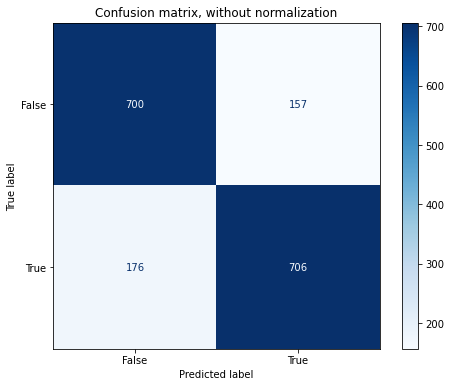

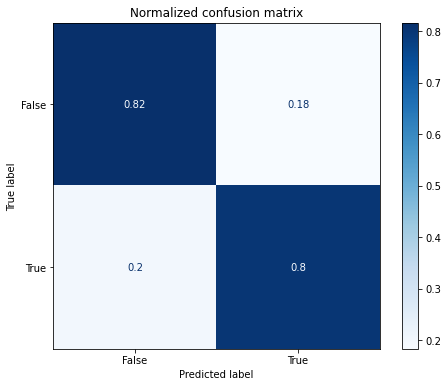

In [34]:
from sklearn.metrics import ConfusionMatrixDisplay

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        gd,
        X_test,
        y_test,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [35]:
kfold= StratifiedKFold(n_splits=10,random_state=42,shuffle=True) #kfold cross validation, 5-subsets

parametrs = {'criterion':['friedman_mse'],'subsample': list(np.arange(0.6,0.9,0.1)) ,'learning_rate': list(np.arange(0.06, 0.14, 0.01)), 'n_estimators':[300]}
gd_cv = RandomizedSearchCV(GradientBoostingClassifier(),parametrs, n_jobs=-1, verbose=2, cv=kfold)

gd_cv.fit(X_train, y_train)

print(f"gd_cv.best_params_: {gd_cv.best_params_}")

print(f"gd_cv.best_estimator_: {gd_cv.best_estimator_}")

print(f"gd_cv.best_score_: {gd_cv.best_score_}")

Fitting 10 folds for each of 10 candidates, totalling 100 fits
gd_cv.best_params_: {'subsample': 0.8999999999999999, 'n_estimators': 300, 'learning_rate': 0.11999999999999997, 'criterion': 'friedman_mse'}
gd_cv.best_estimator_: GradientBoostingClassifier(learning_rate=0.11999999999999997, n_estimators=300,
                           subsample=0.8999999999999999)
gd_cv.best_score_: 0.8058734391796907


Confusion matrix, without normalization
[[701 156]
 [165 717]]
Normalized confusion matrix
[[0.82 0.18]
 [0.19 0.81]]


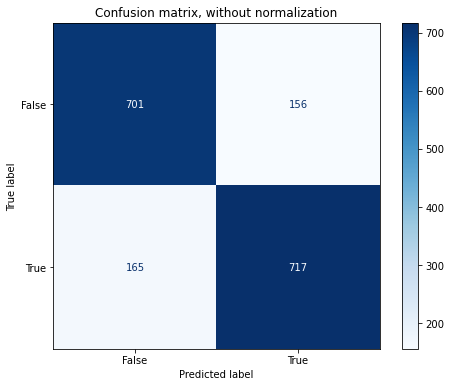

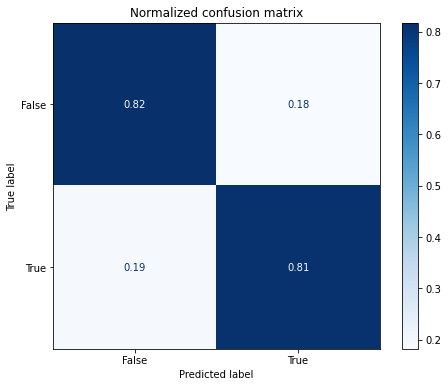

In [36]:
from sklearn.metrics import ConfusionMatrixDisplay

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        gd_cv,
        X_test,
        y_test,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [37]:
print(f"f1_score {f1_score(y_test, gd_cv.predict(X_test))}")
print(f"precision_score {precision_score(y_test, gd_cv.predict(X_test))}")
print(f"recall_score {recall_score(y_test, gd_cv.predict(X_test))}")
print(f"accuracy_score {accuracy_score(y_test, gd_cv.predict(X_test))}")

# gd_cv.best_params_: {'subsample': 0.8999999999999999, 'n_estimators': 3000, 'learning_rate': 0.060000000000000005, 'criterion': 'friedman_mse'}
# accuracy_score 0.8205865439907993 - gd_cv.best_params_: {'subsample': 0.7999999999999999, 'n_estimators': 300, 'learning_rate': 0.08999999999999998, 'criterion': 'friedman_mse'}

f1_score 0.8170940170940171
precision_score 0.8213058419243986
recall_score 0.8129251700680272
accuracy_score 0.8154111558366878


In [38]:
predictions = gd_cv.predict(sub)

submission = pd.read_csv('C:/datasets/spaceship-titanic/sample_submission.csv')

submission['Transported'] = predictions

submission.to_csv('C:/datasets/spaceship-titanic/newest2.csv', index=False)

pd.read_csv('C:/datasets/spaceship-titanic/newest2.csv')

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True
